In [1]:
from __future__ import annotations

import seaborn as sns

from utils import get_trial_dirs, get_trial_ids, get_trial_info, get_trial_params, get_trial_progress, plot_trials

sns.set_theme()

In [2]:
search_params = [
    "batch_size", 
    "lr", 
    "n_hidden", 
    "n_latent", 
    "n_layers",
]
experiment_id = "2023_08_22_human_full"
root_dir = f"../logs/{experiment_id}"

In [3]:
trial_dirs = get_trial_dirs(root_dir, filter_incomplete=True)
trial_ids = get_trial_ids(trial_dirs)

trial_params = {trial_id: get_trial_params(root_dir, trial_dir, search_params) for trial_id, trial_dir in zip(trial_ids, trial_dirs)}
trial_progress = {trial_id: get_trial_progress(root_dir, trial_dir) for trial_id, trial_dir in zip(trial_ids, trial_dirs)}
trial_info = get_trial_info(trial_params, trial_progress)

Missing progress.csv for _trainable_b6d775cc_1_batch_size=2048,lr=0.0100,n_hidden=256,n_latent=10,n_layers=10,var_activation=ref_ph_ecd03db6_2023-08-17_16-39-25
Missing progress.csv for _trainable_f8003819_45_batch_size=2048,lr=0.0100,n_hidden=256,n_latent=50,n_layers=1,var_activation=ref_ph_ecd03db6_2023-08-21_14-51-17
Missing progress.csv for _trainable_2d9a9cf5_141_batch_size=2048,lr=0.0100,n_hidden=128,n_latent=100,n_layers=25,var_activation=ref_ph_ecd03db6_2023-08-17_16-31-33
Missing progress.csv for _trainable_57c97f03_41_batch_size=512,lr=0.0001,n_hidden=512,n_latent=100,n_layers=25,var_activation=ref_ph_ecd03db6_2023-08-19_07-56-10
Missing progress.csv for _trainable_c000f380_147_batch_size=512,lr=0.0100,n_hidden=128,n_latent=100,n_layers=1,var_activation=ref_ph_ecd03db6_2023-08-17_16-31-43


batch_size      lr  n_hidden  n_latent  n_layers  iters
21        1024  0.0001       512        10         1      2
8          512  0.0100       512        50        25      1
1          512  0.0010       512       100        25      4
49        1024  0.0010       128        50         1      2
12        2048  0.0001       256       100        10      1

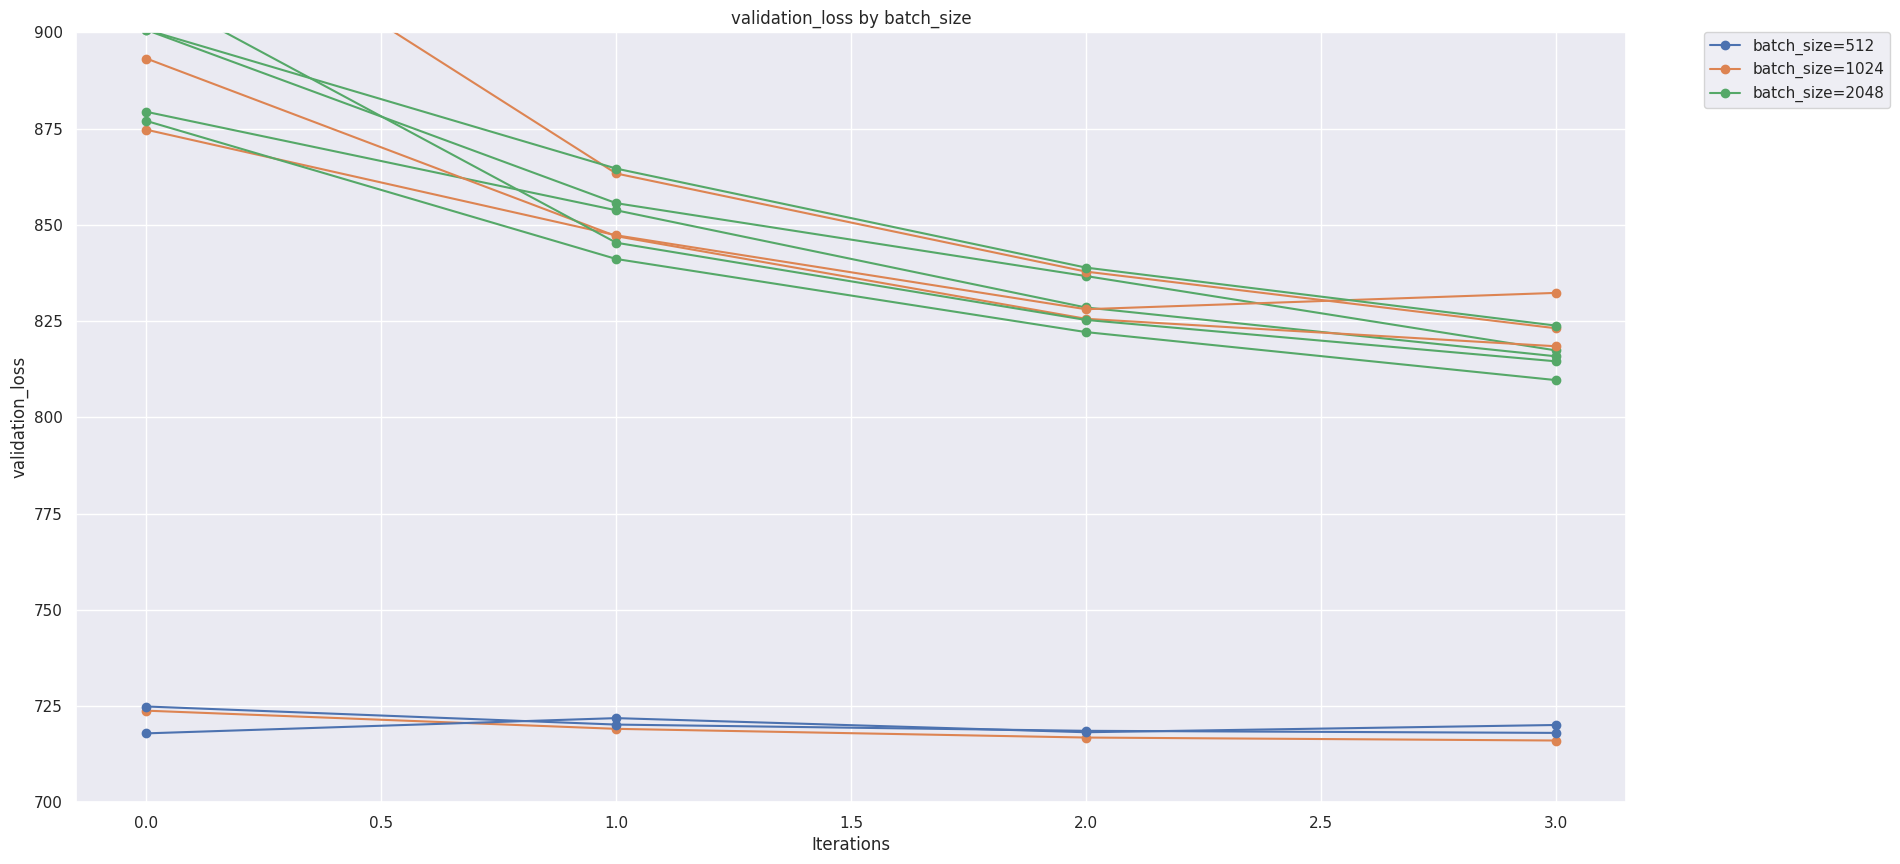

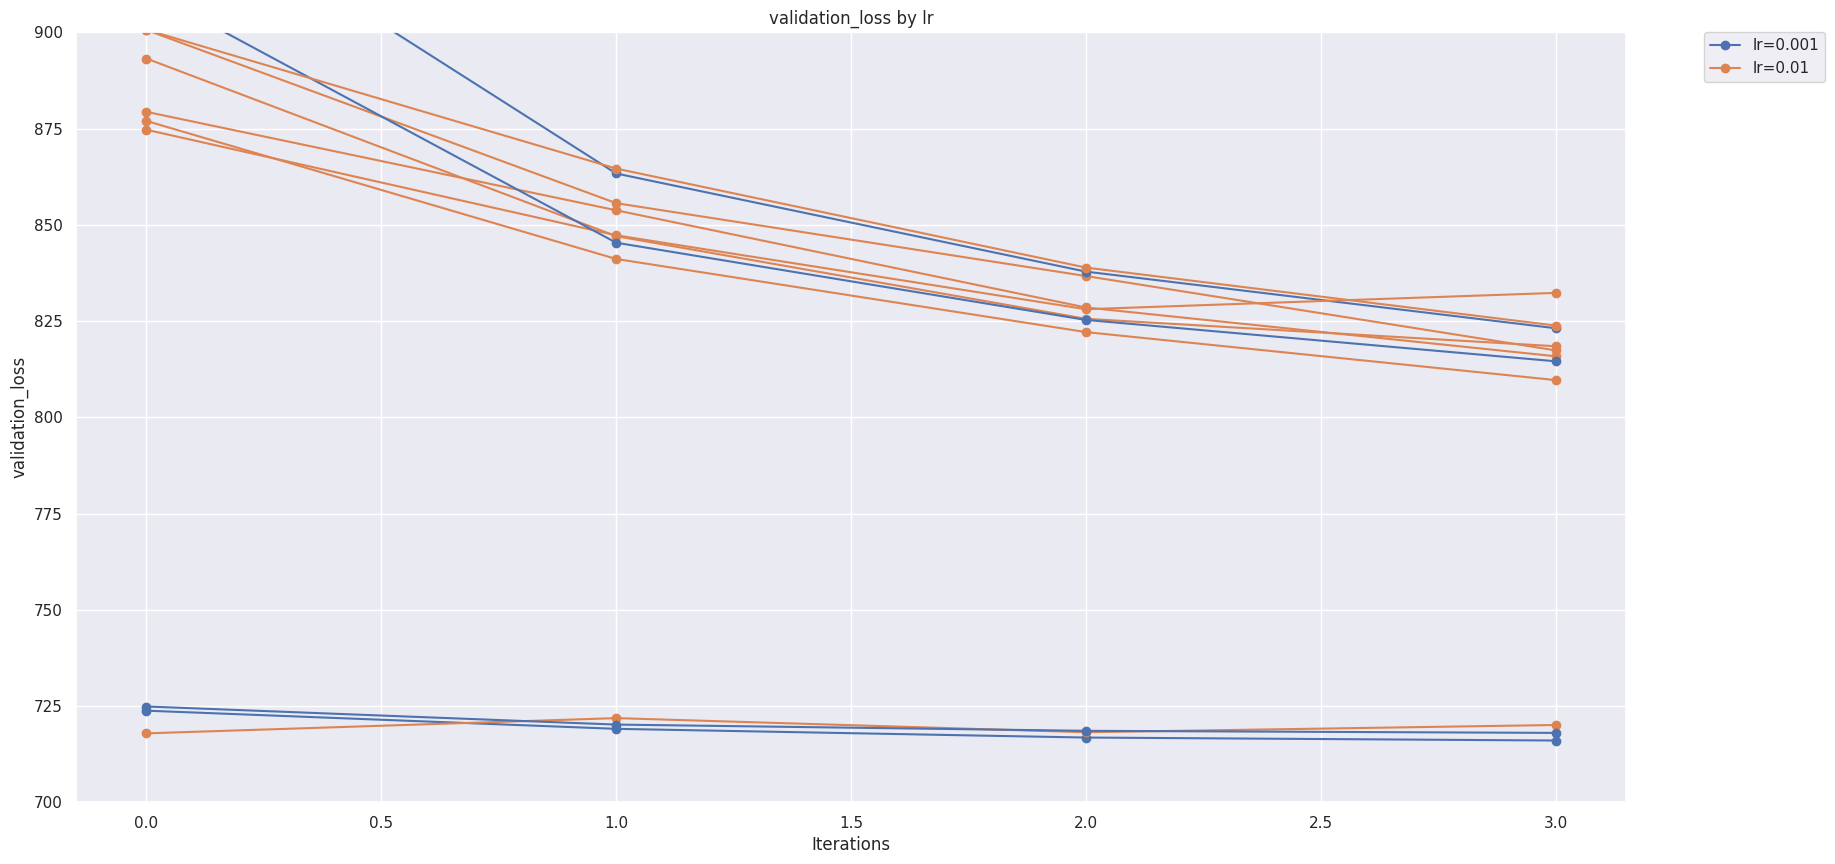

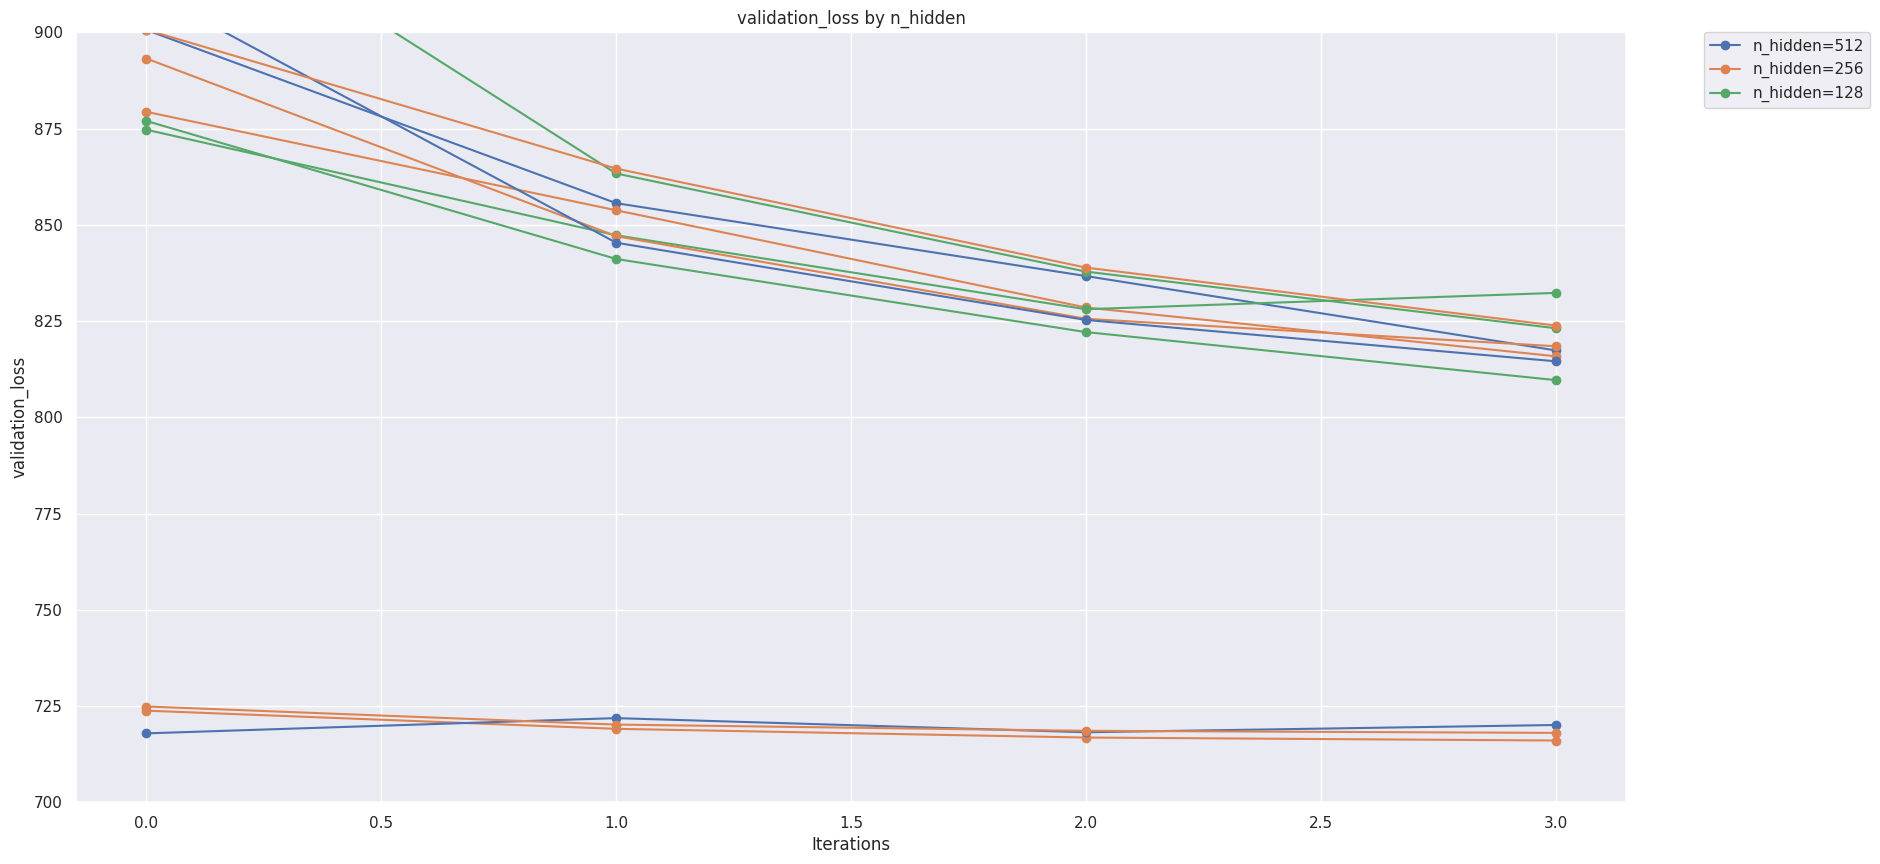

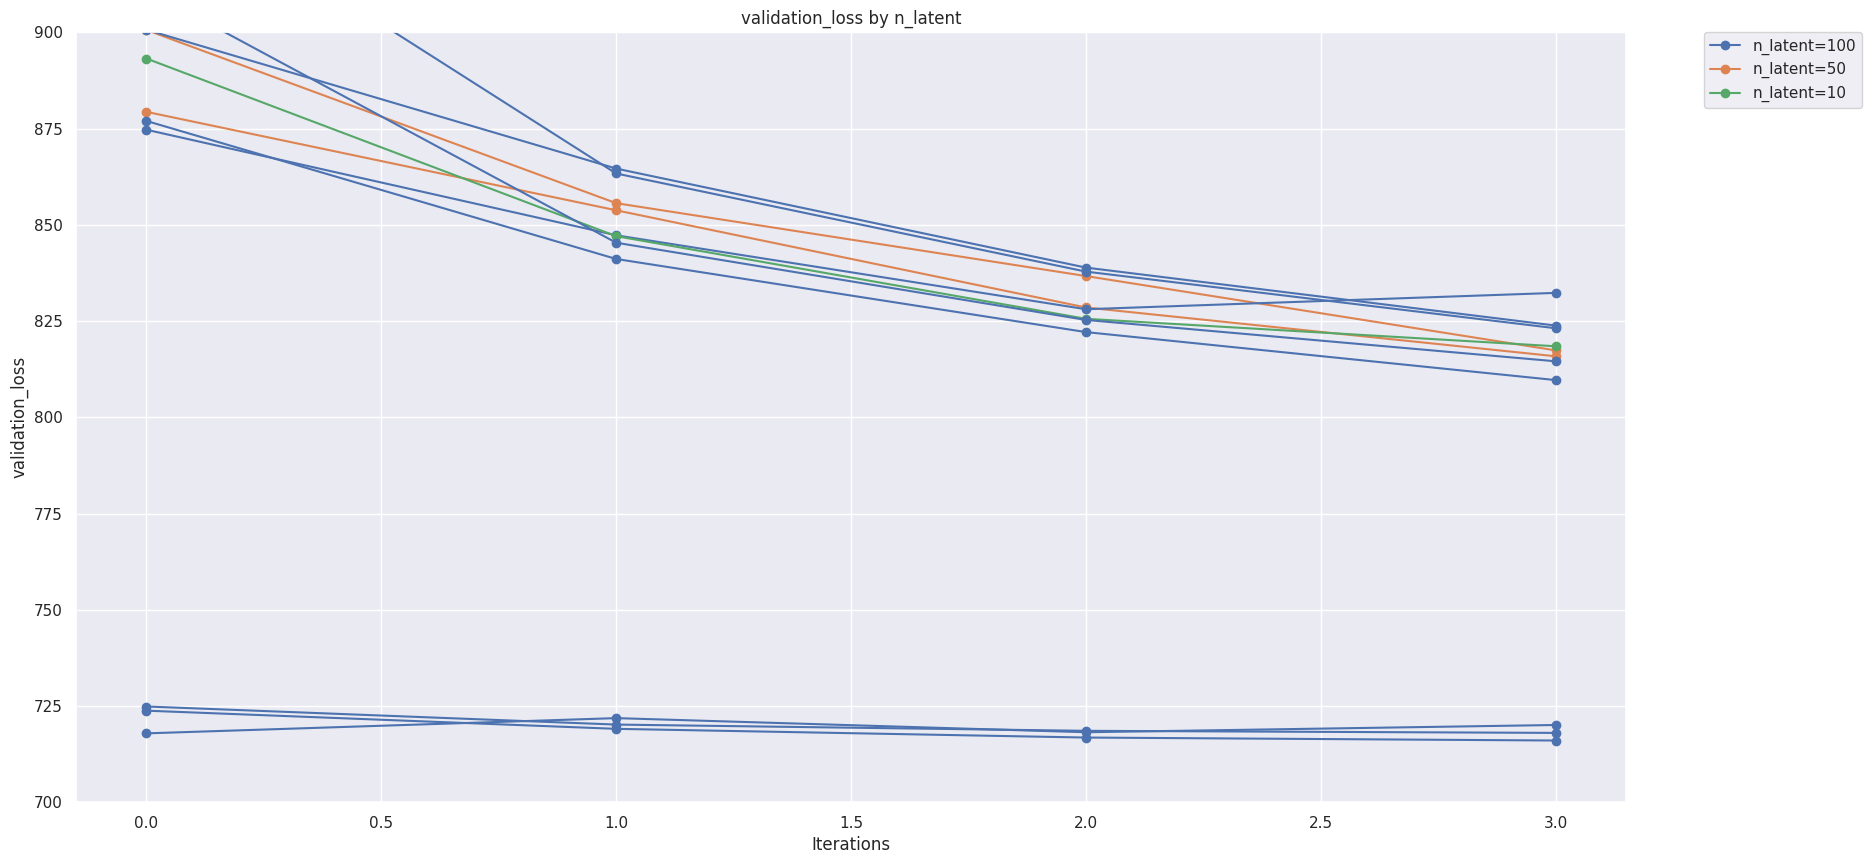

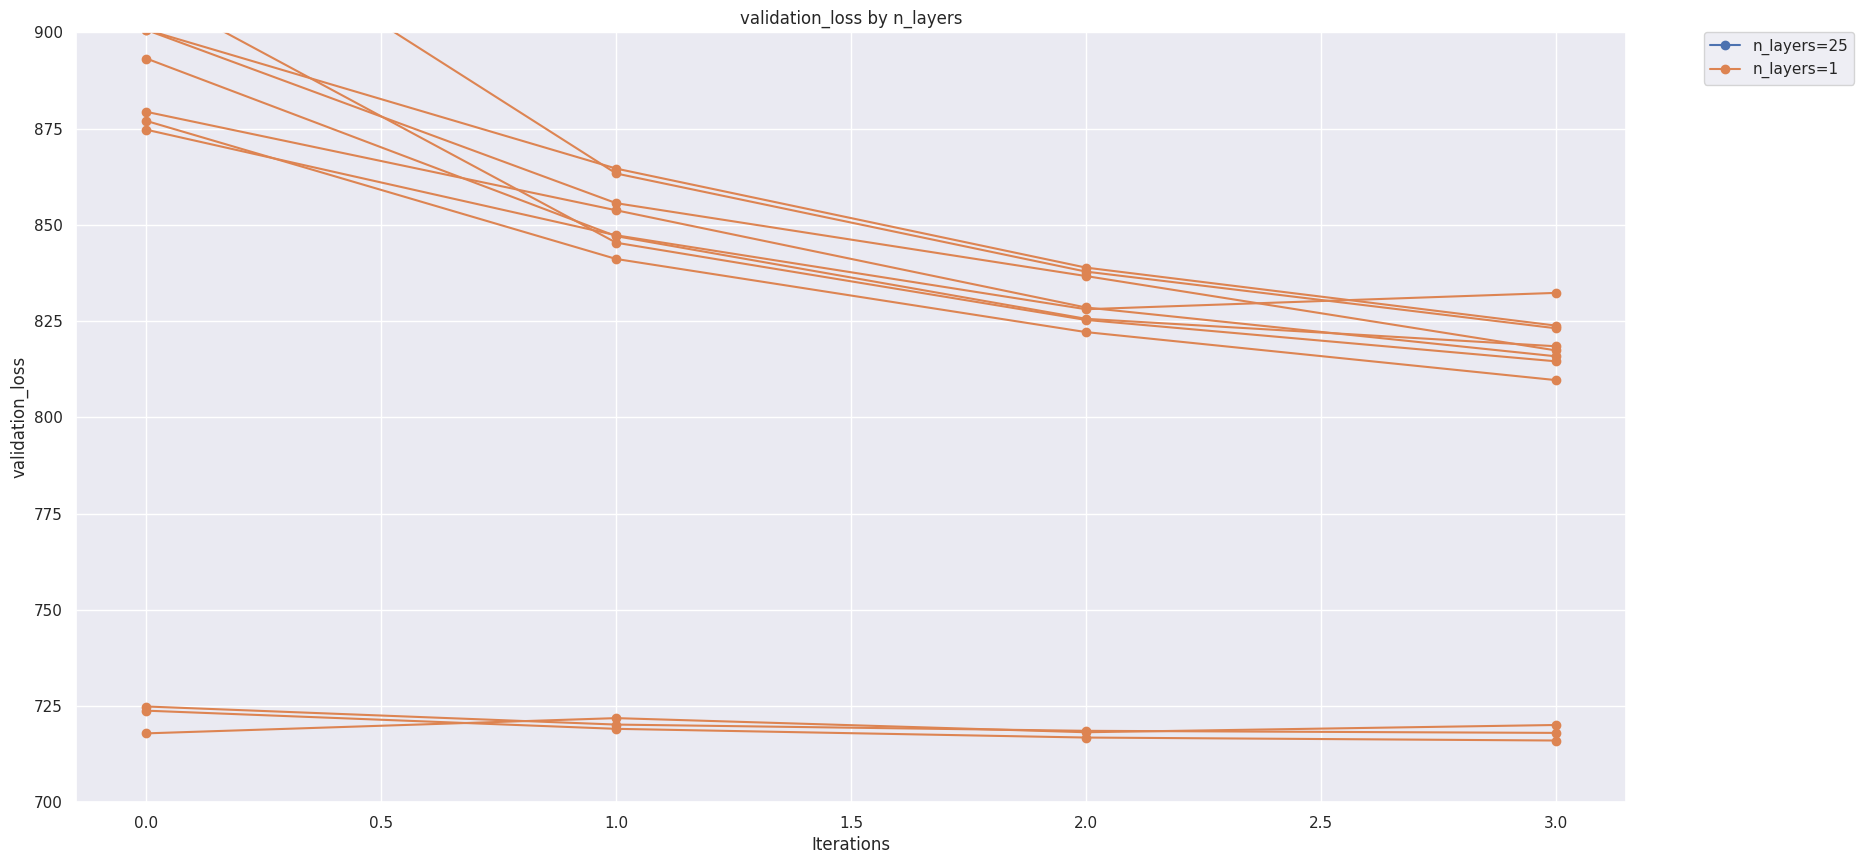

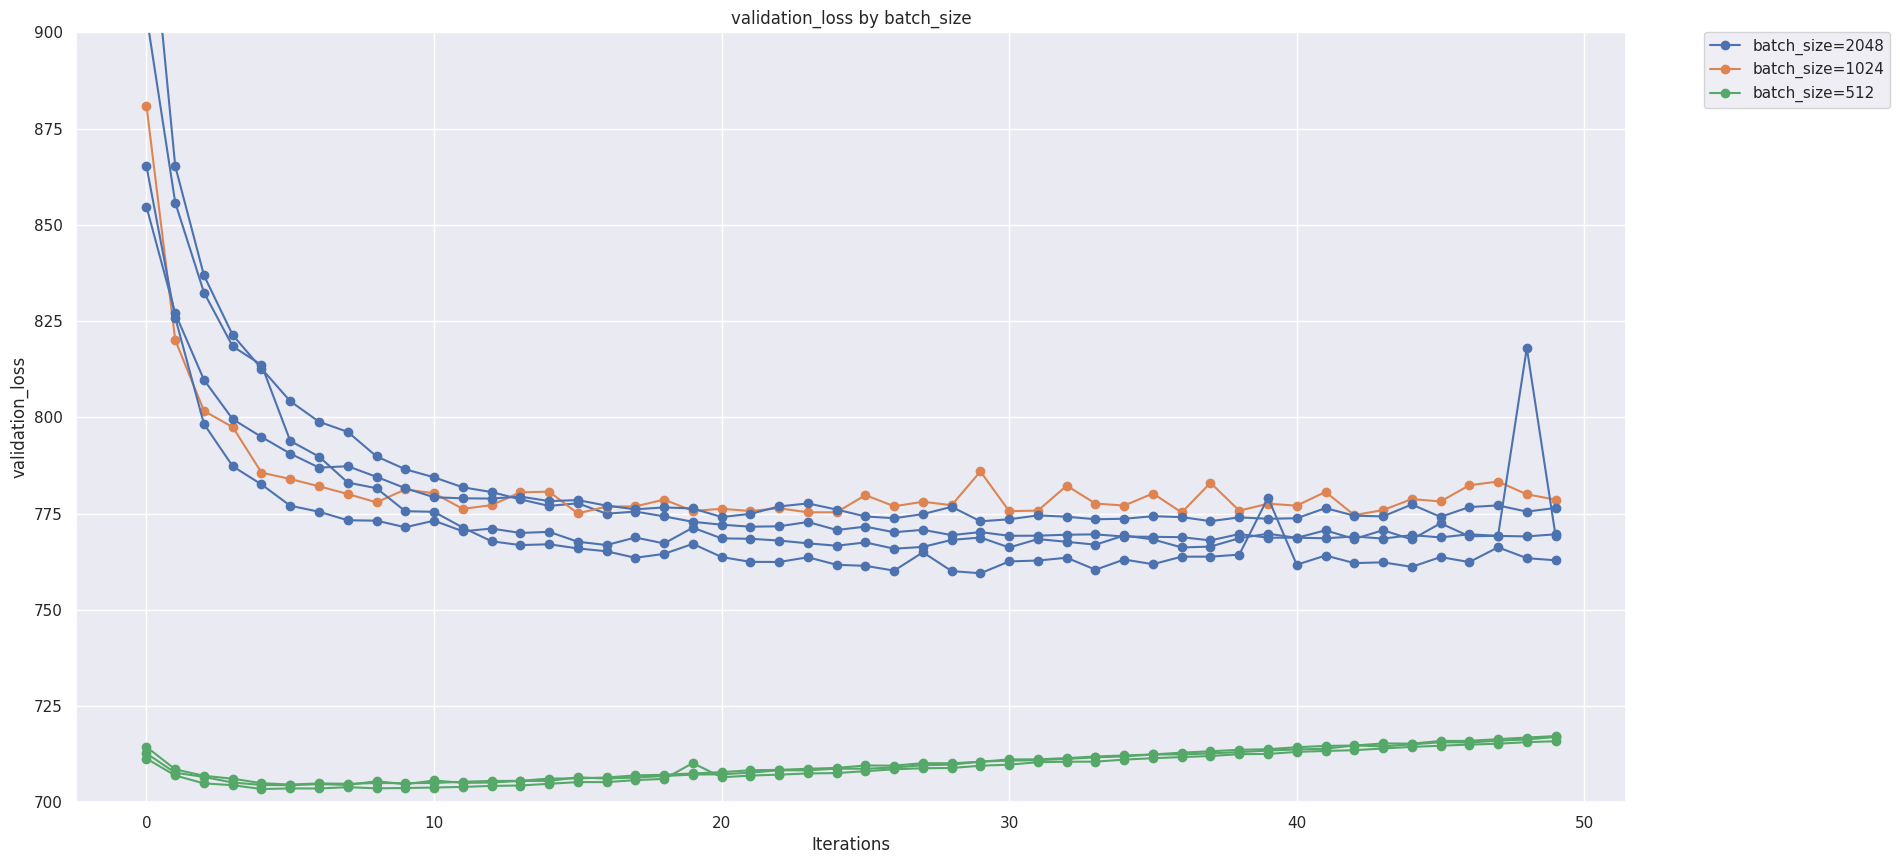

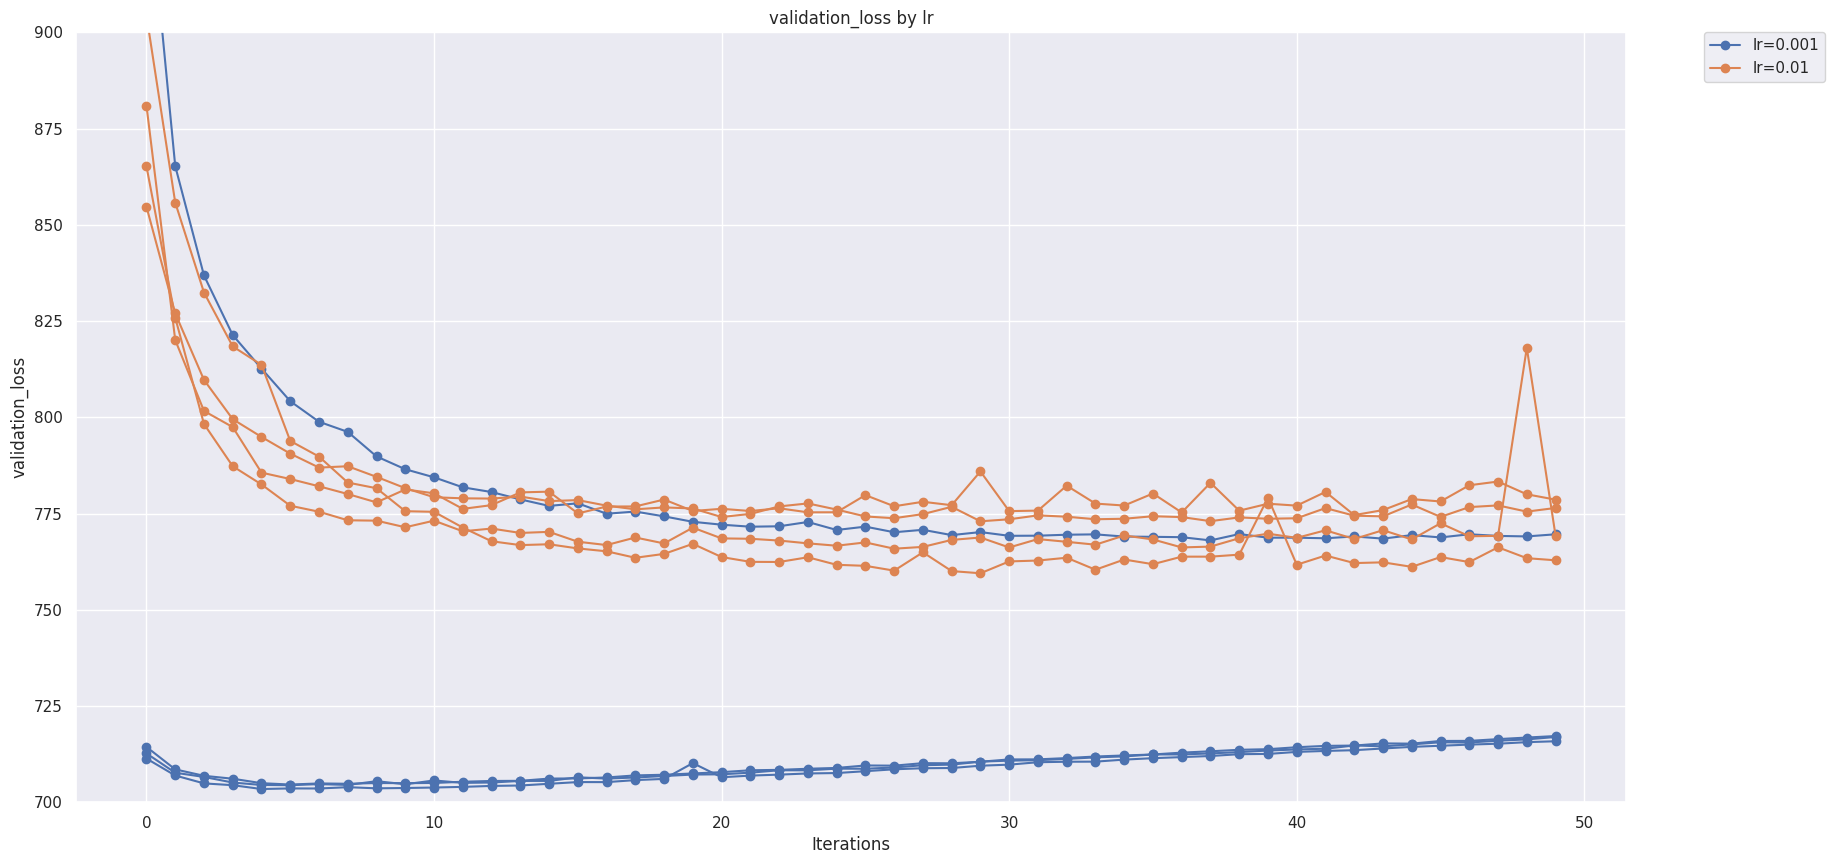

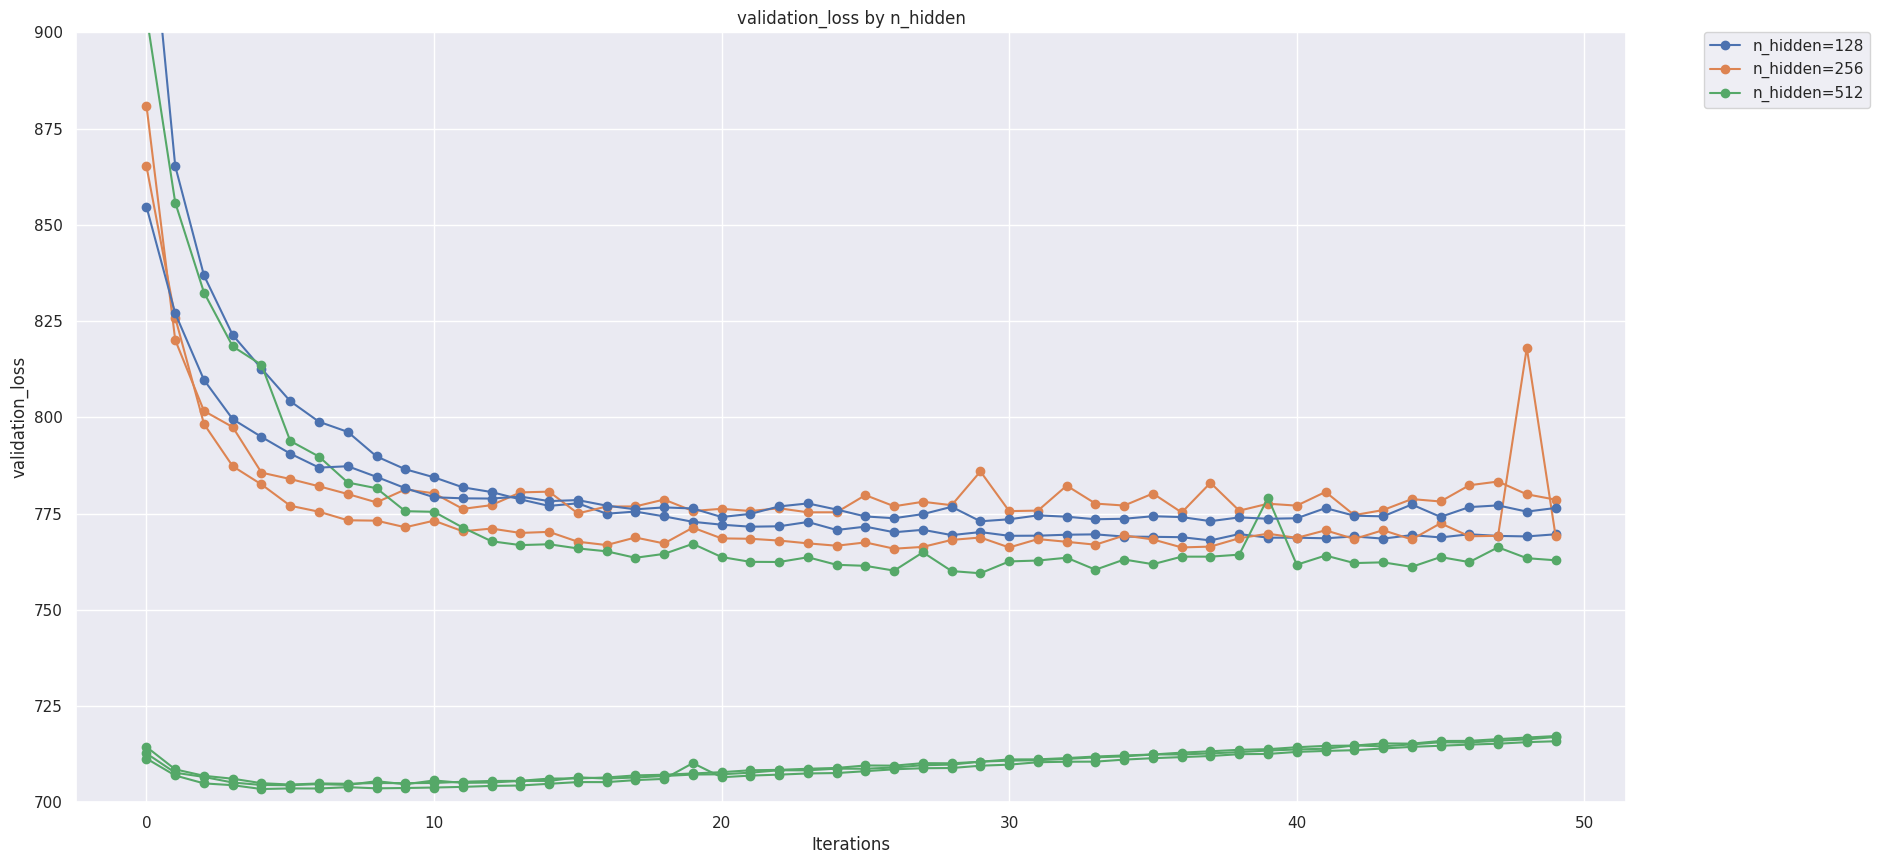

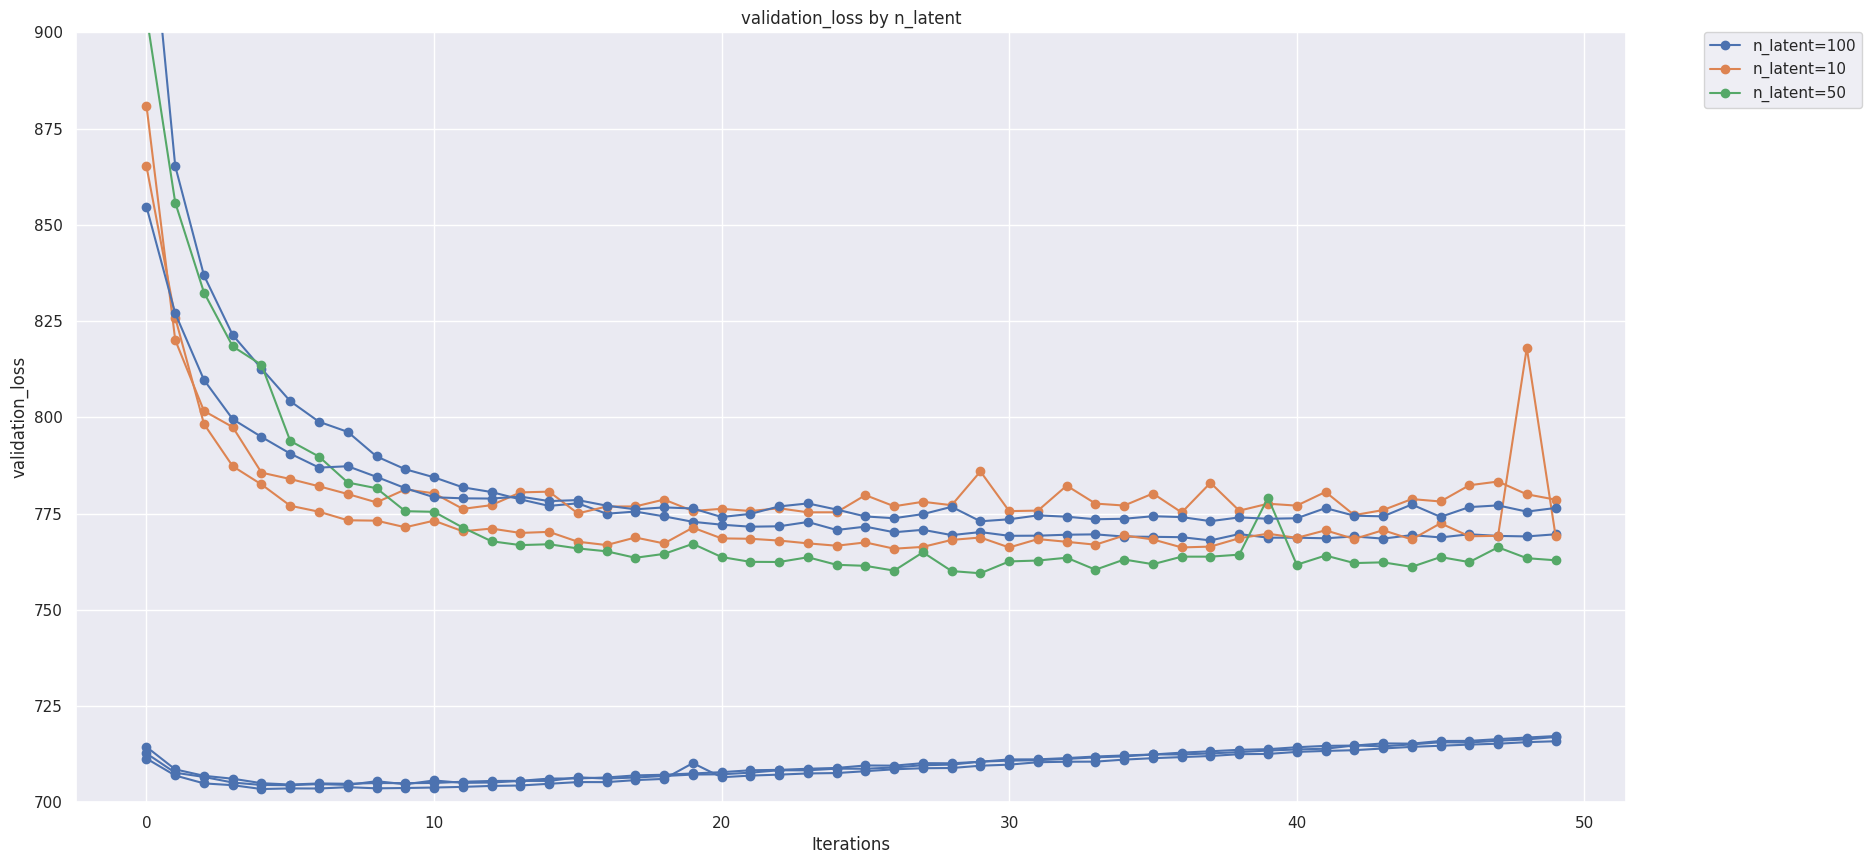

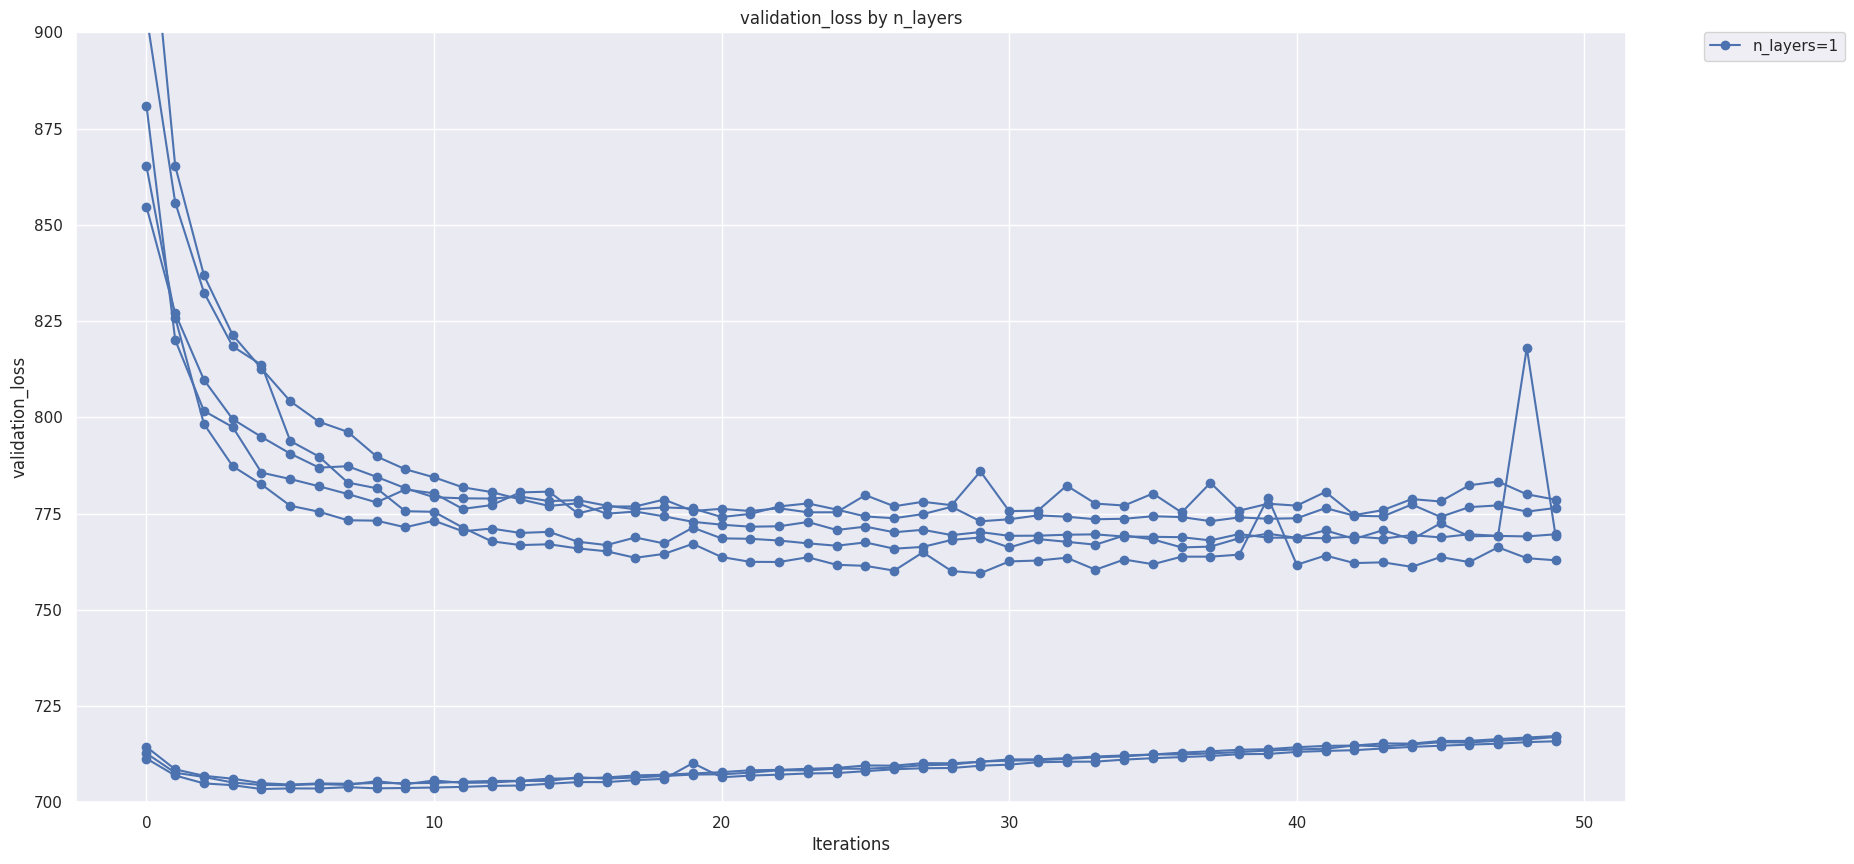

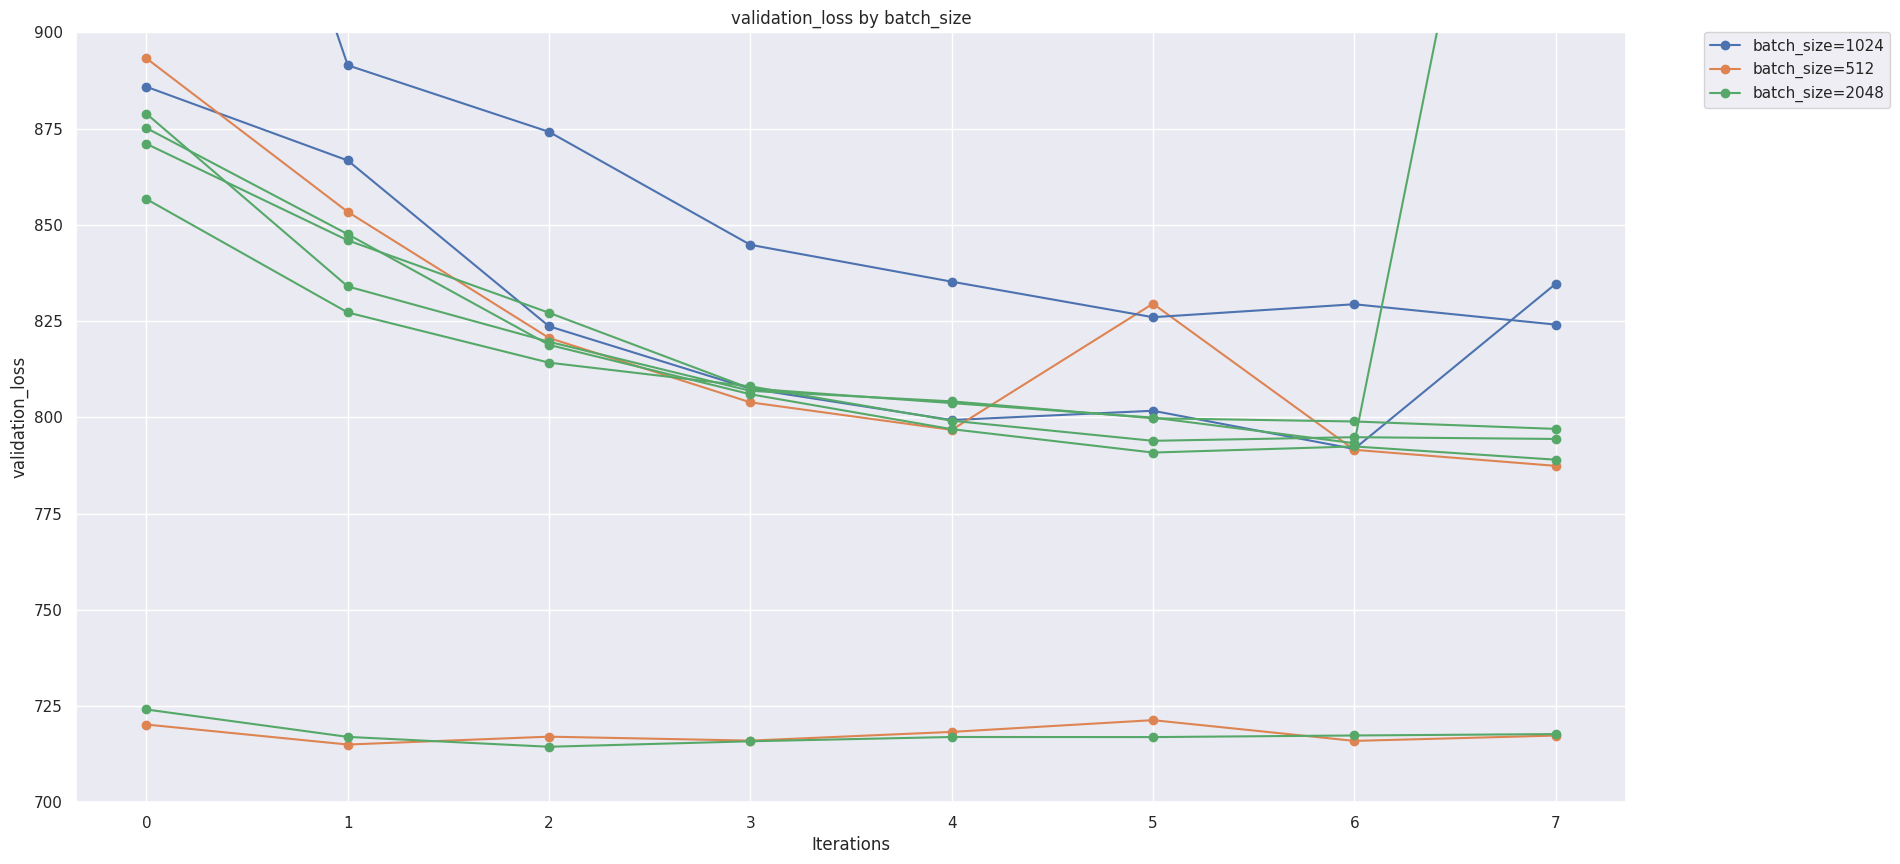

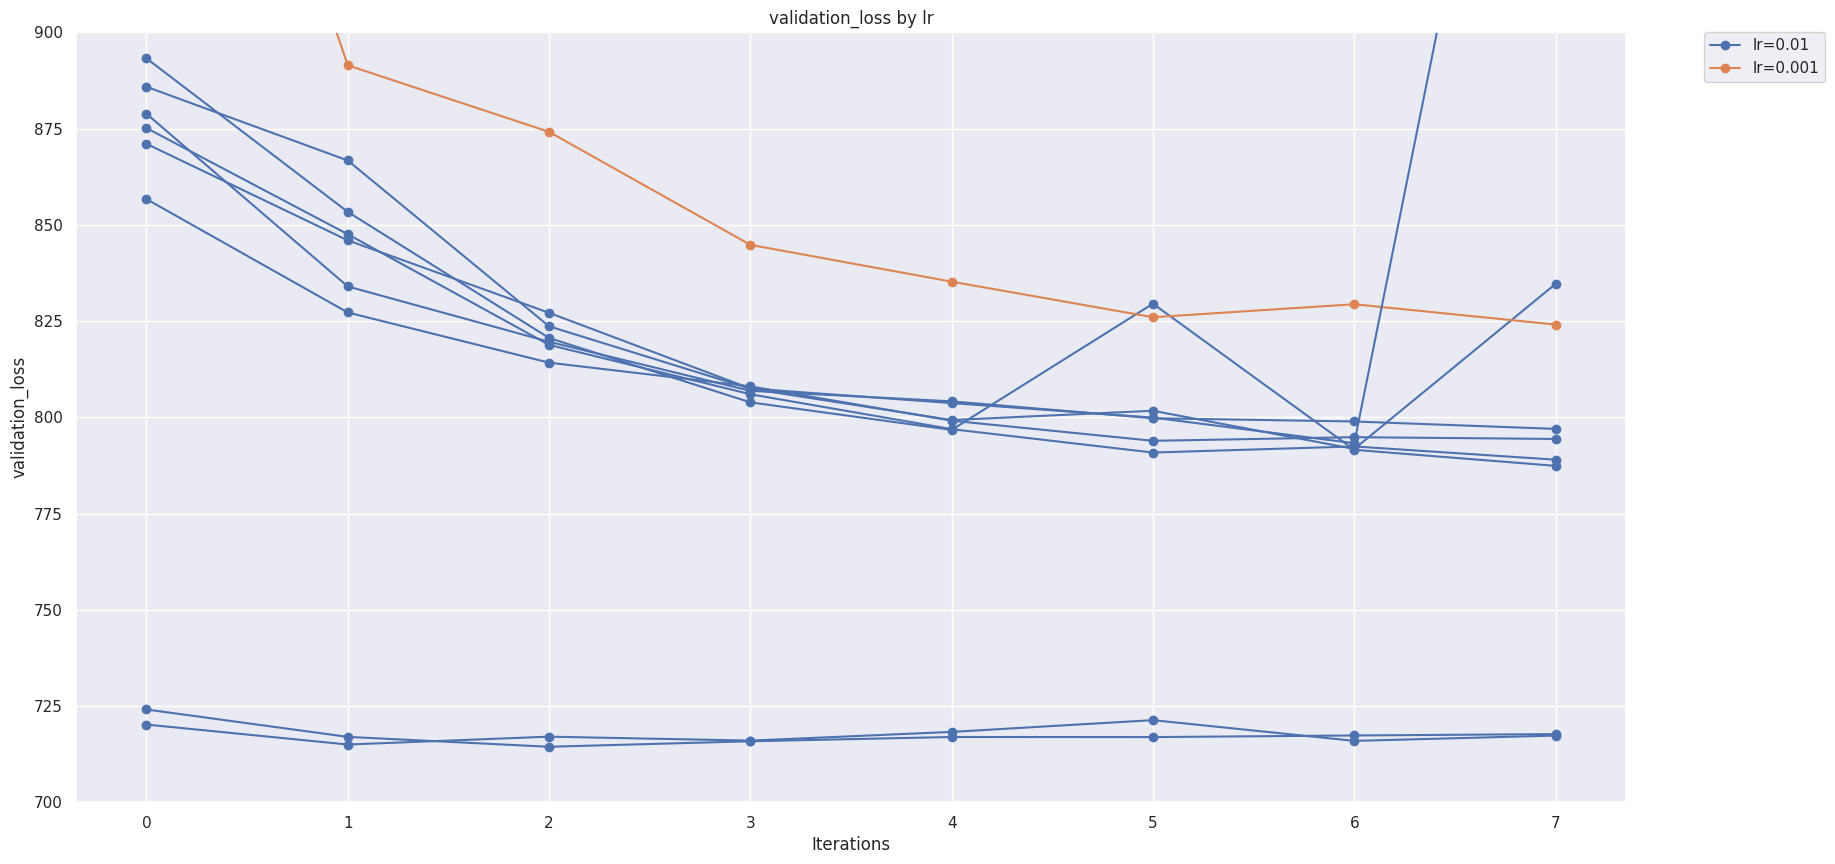

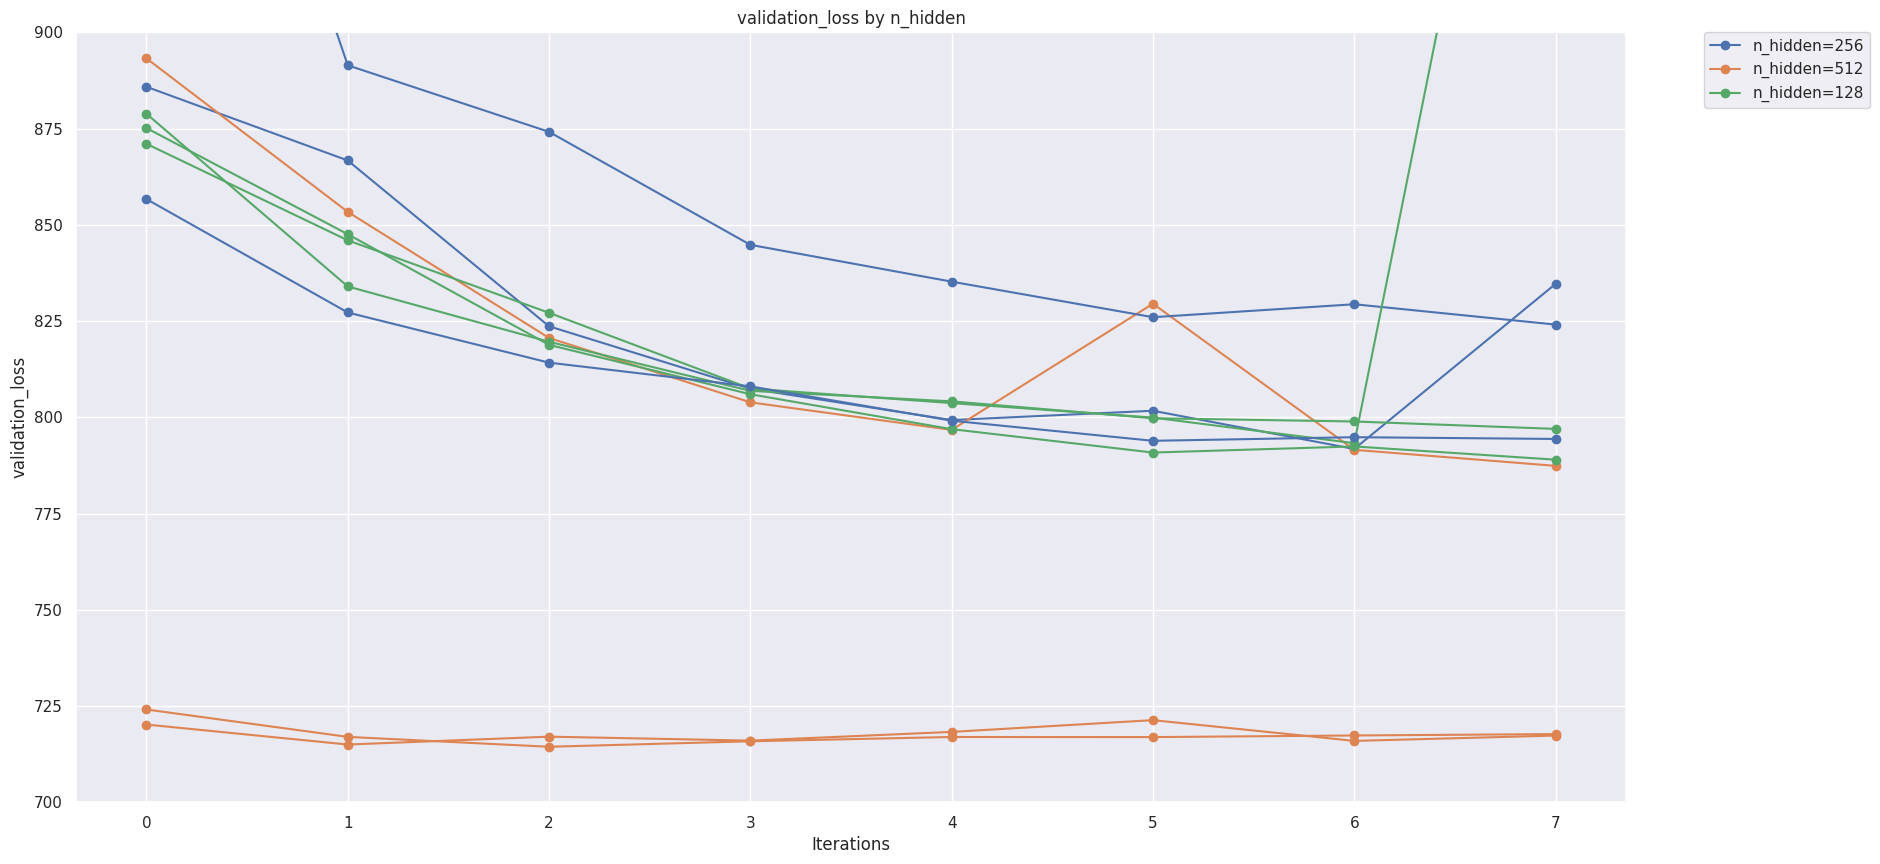

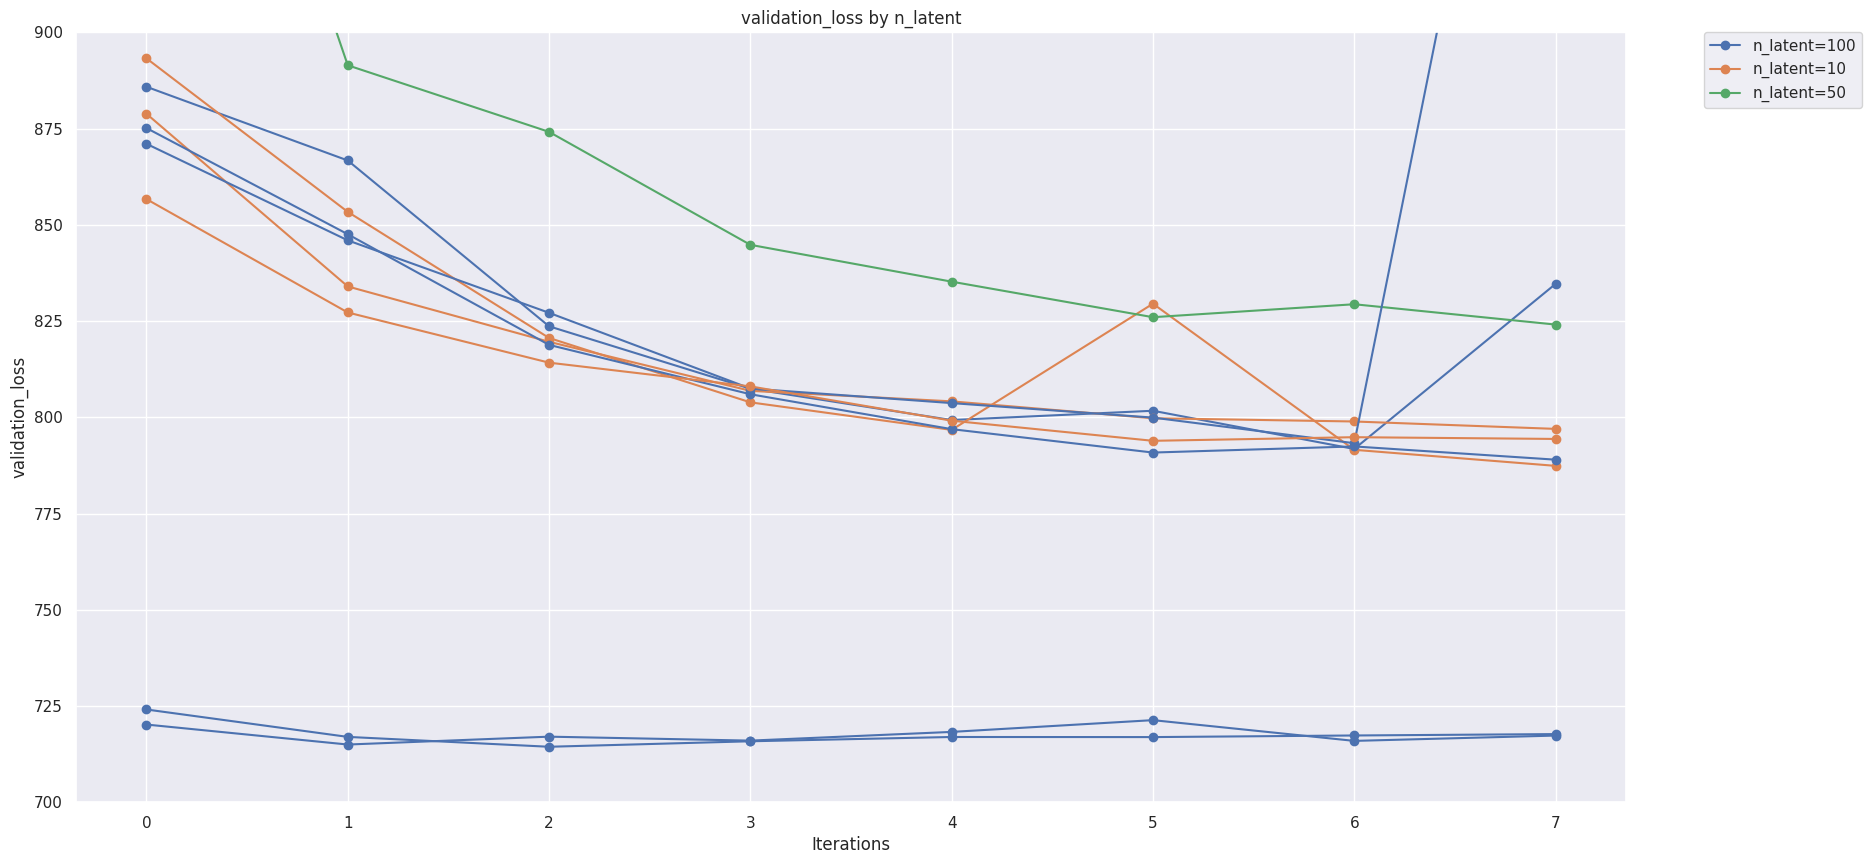

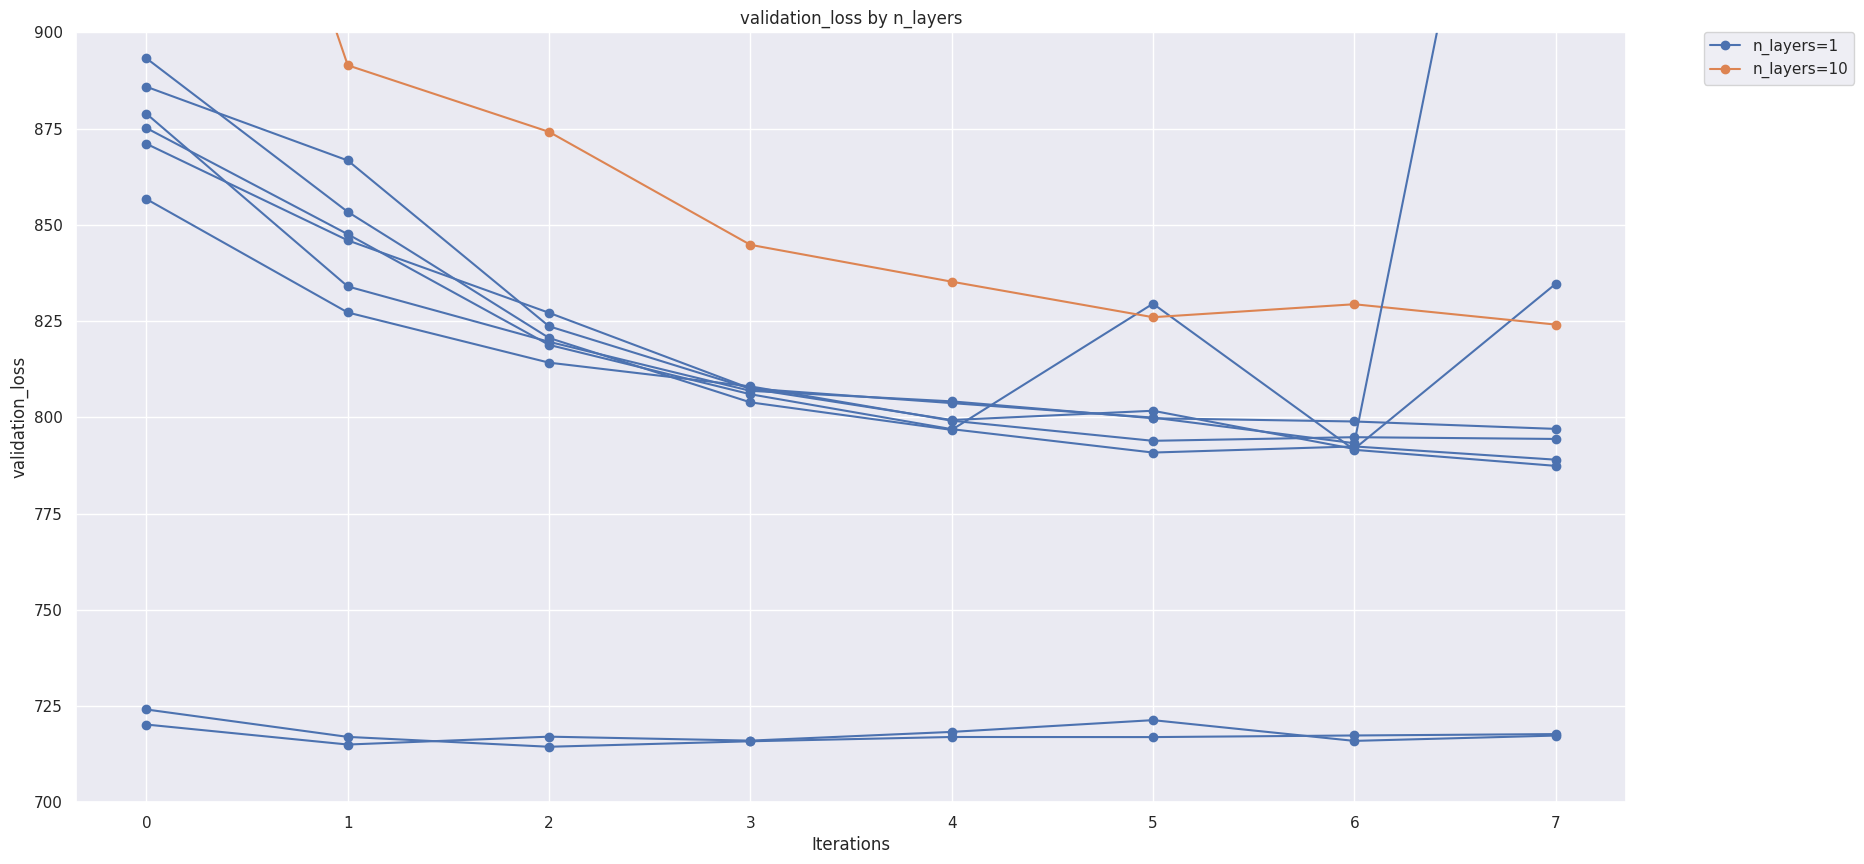

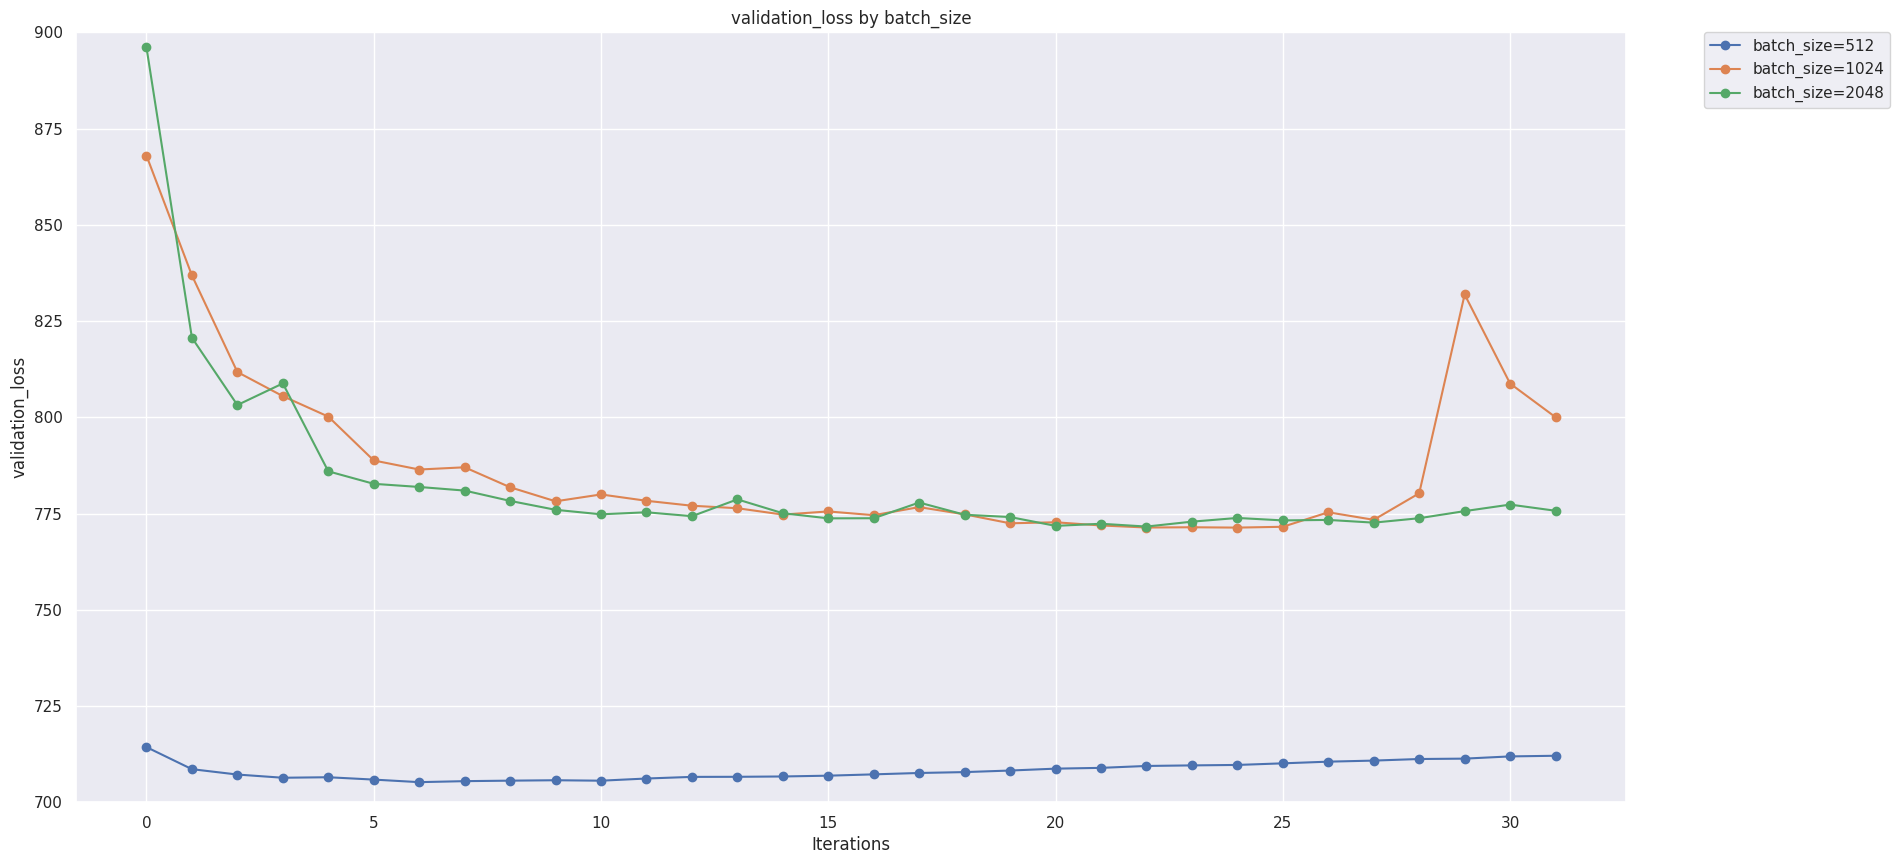

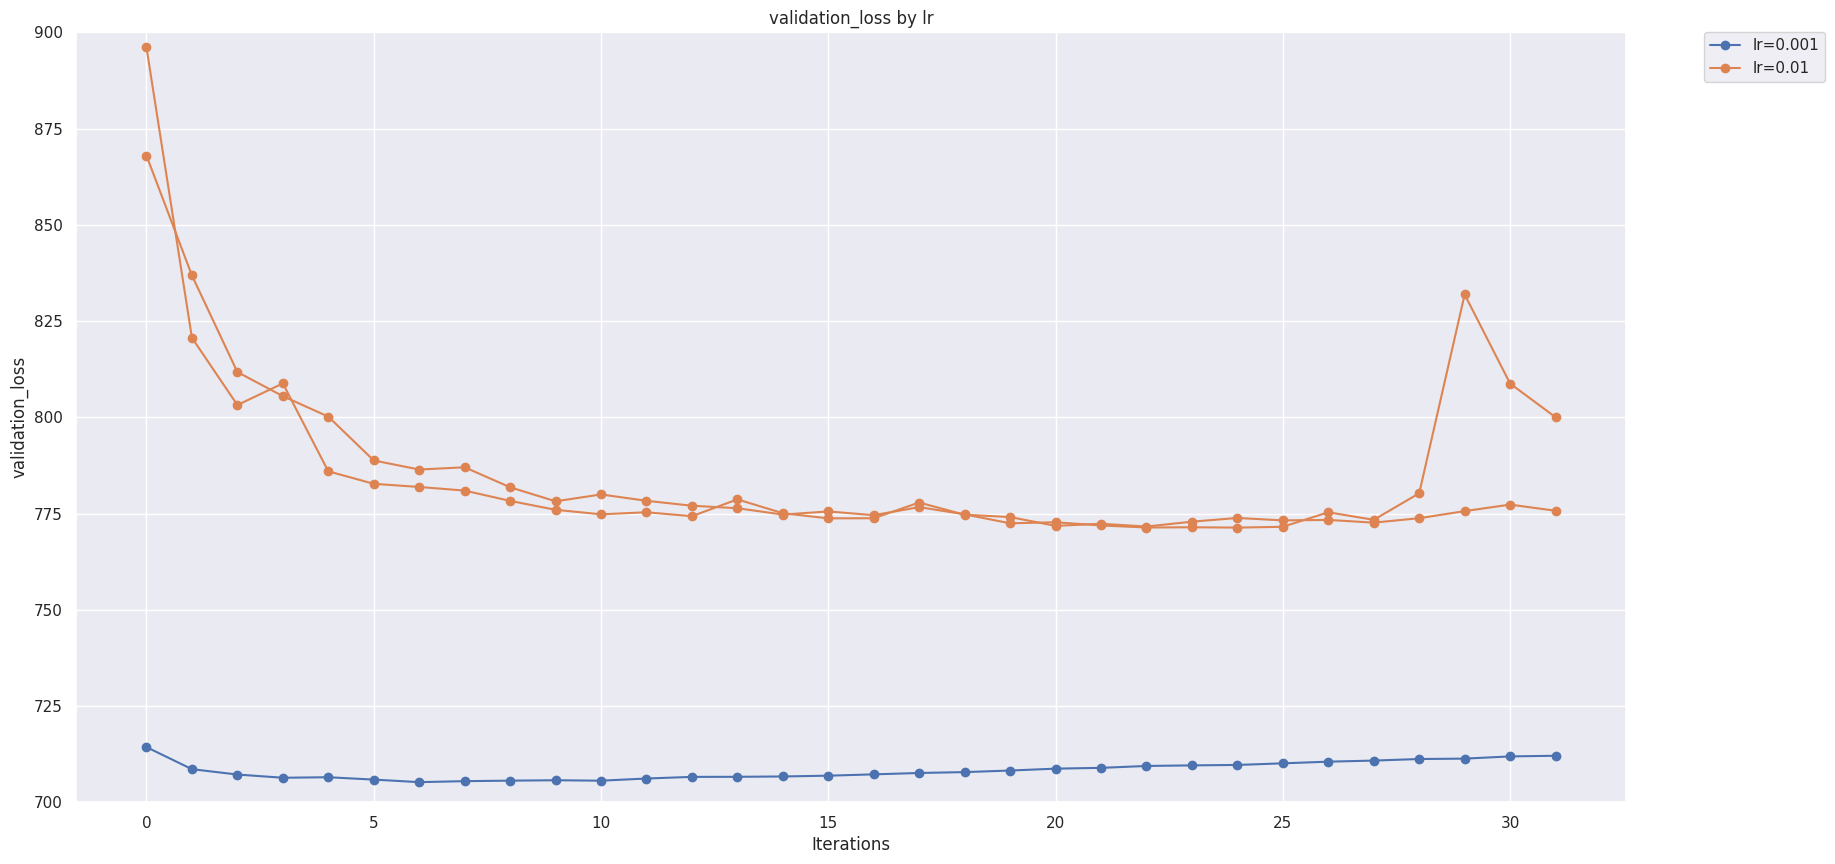

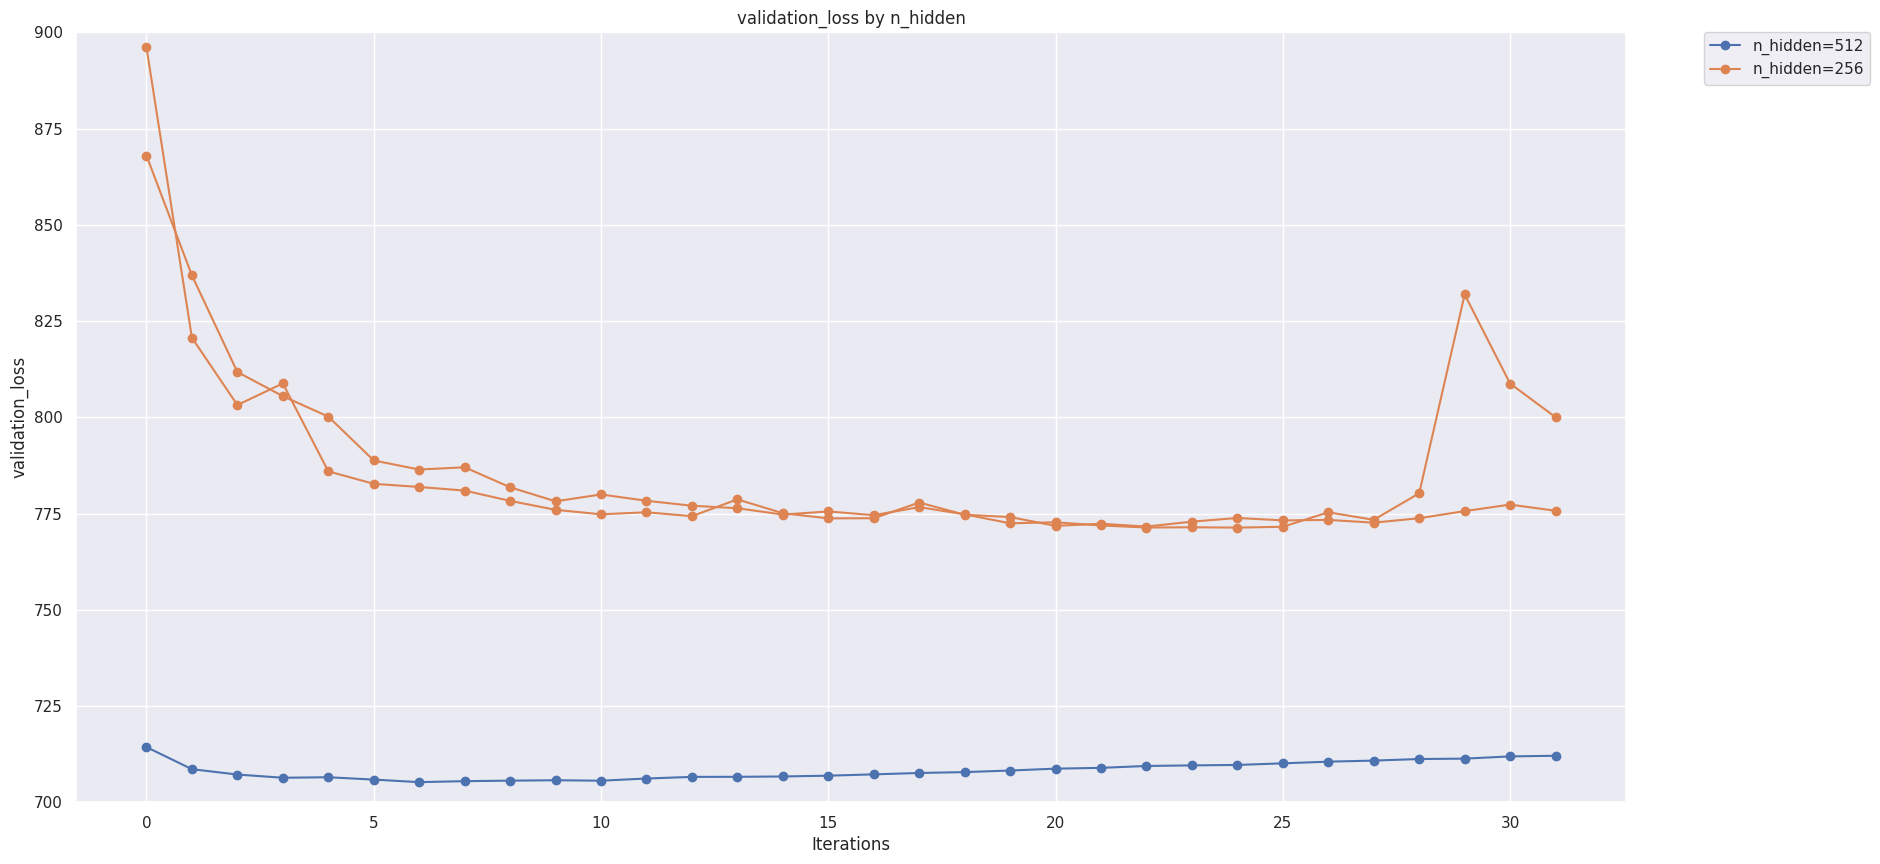

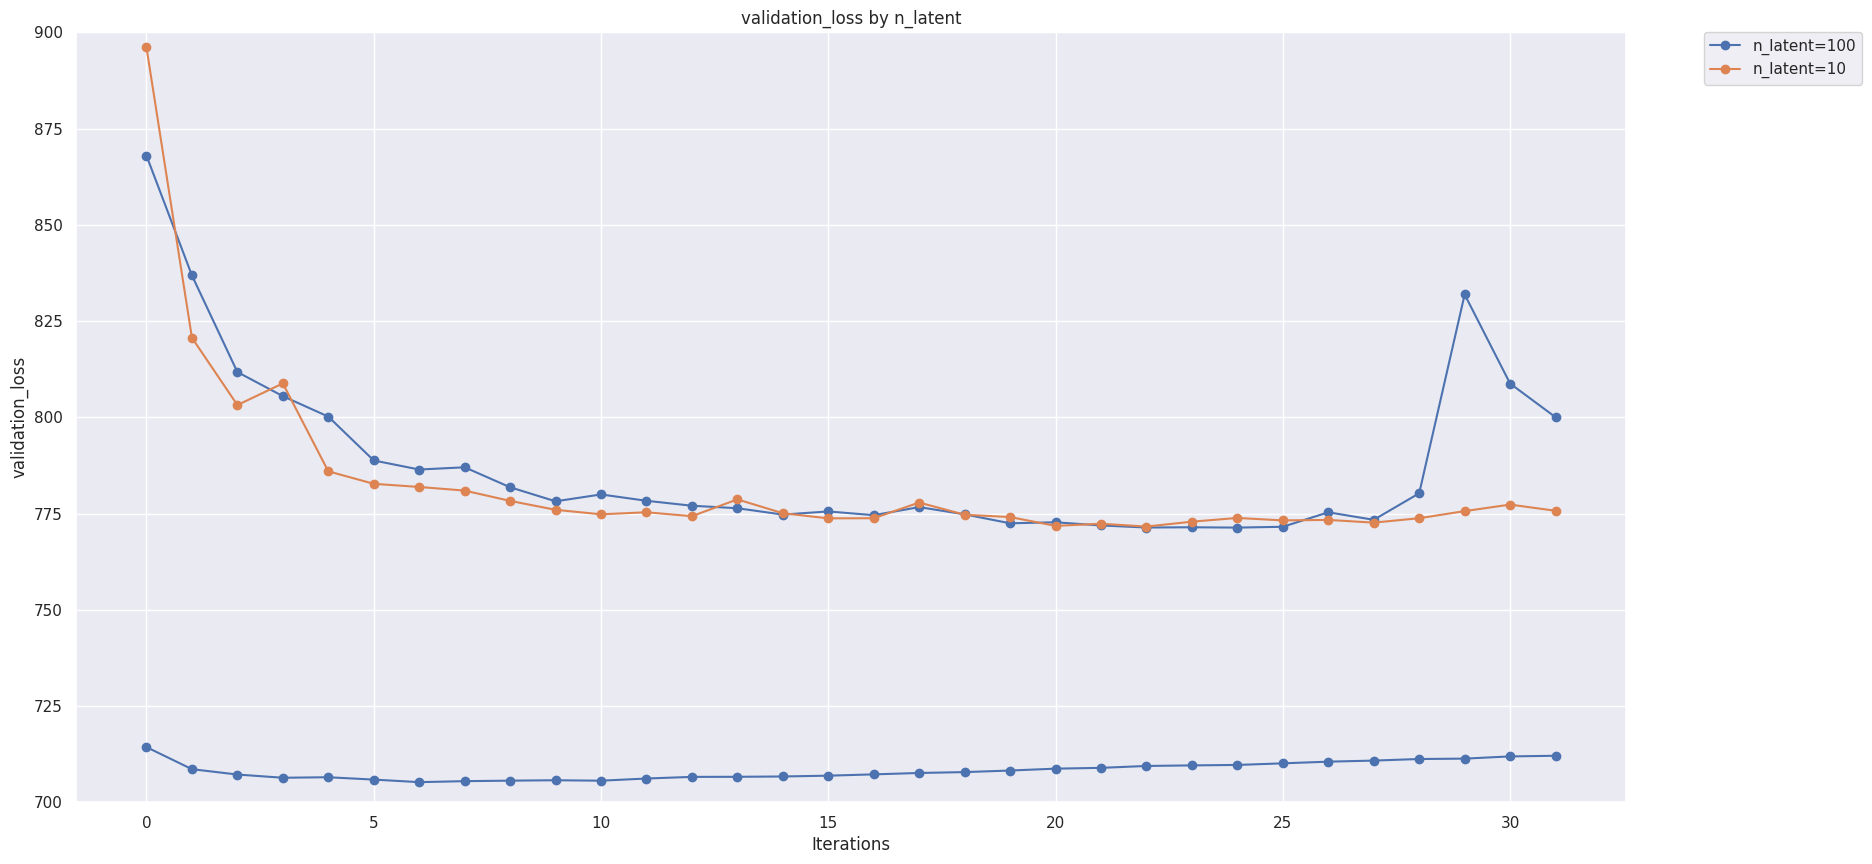

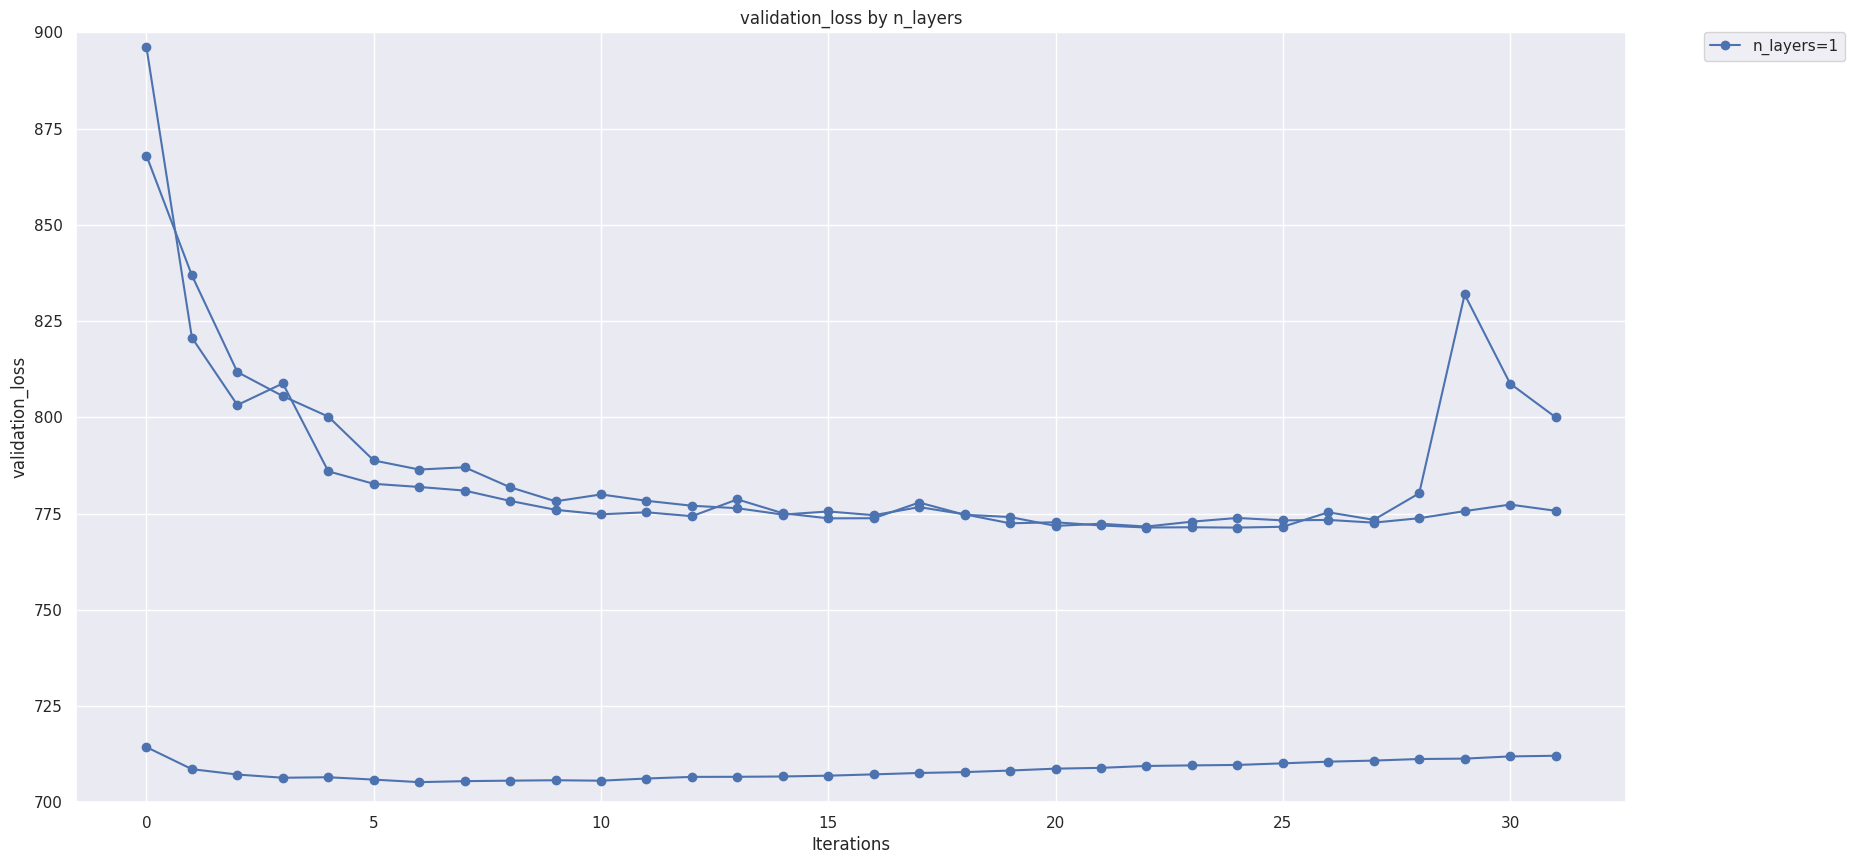

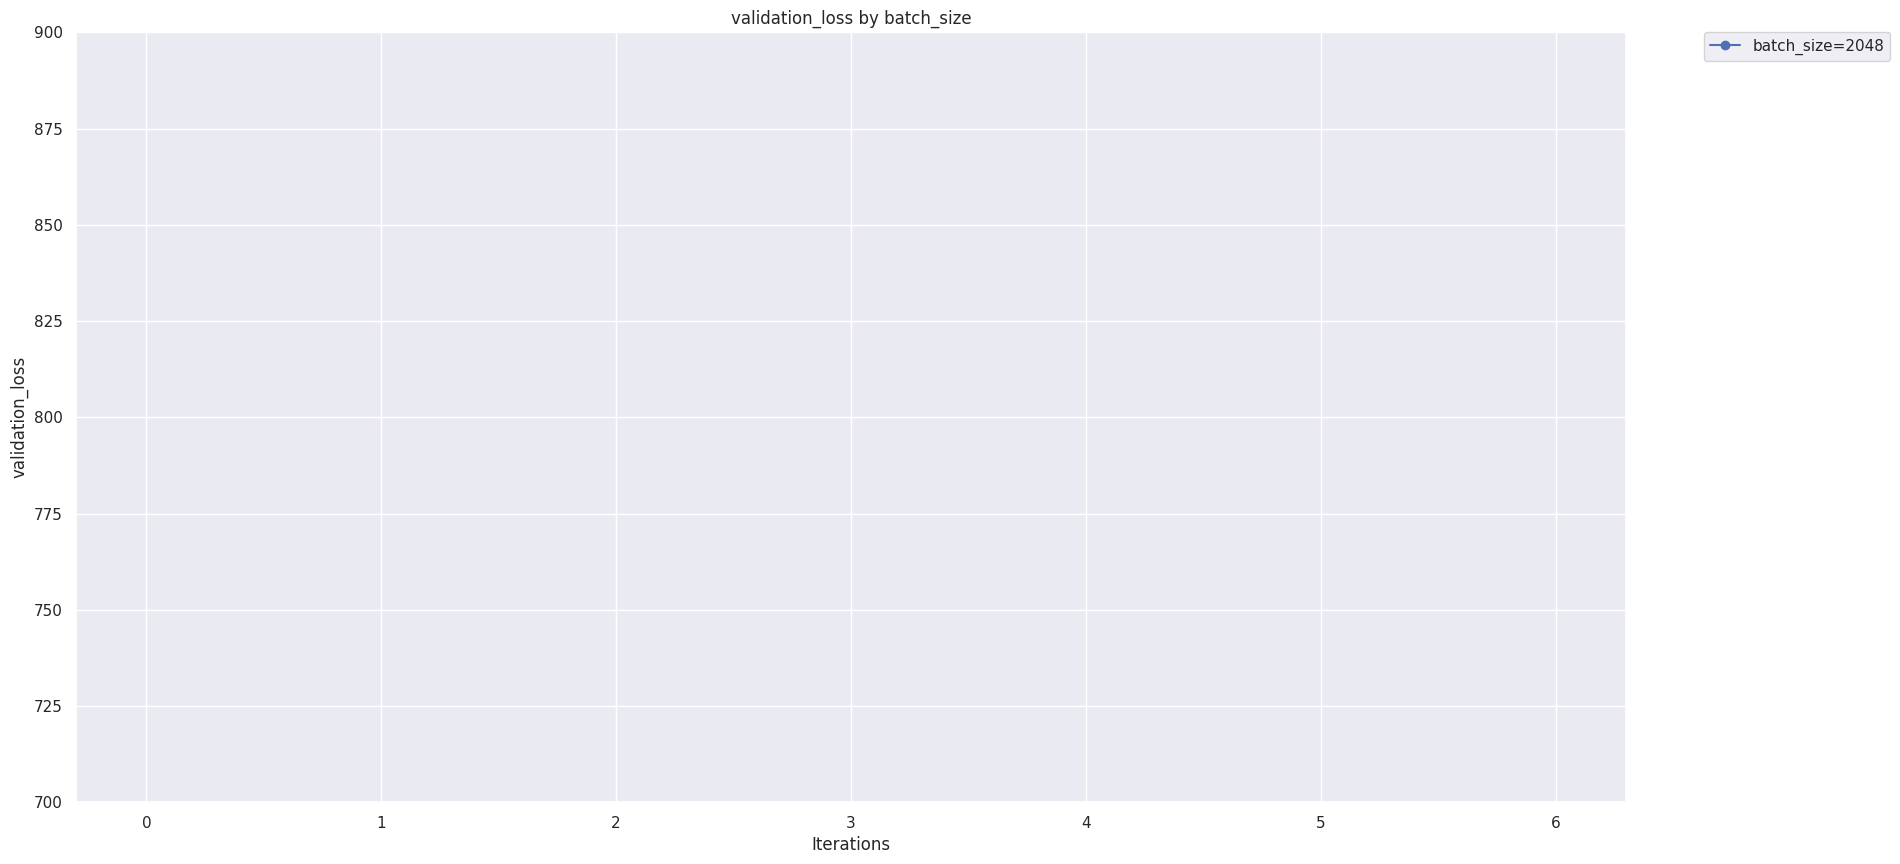

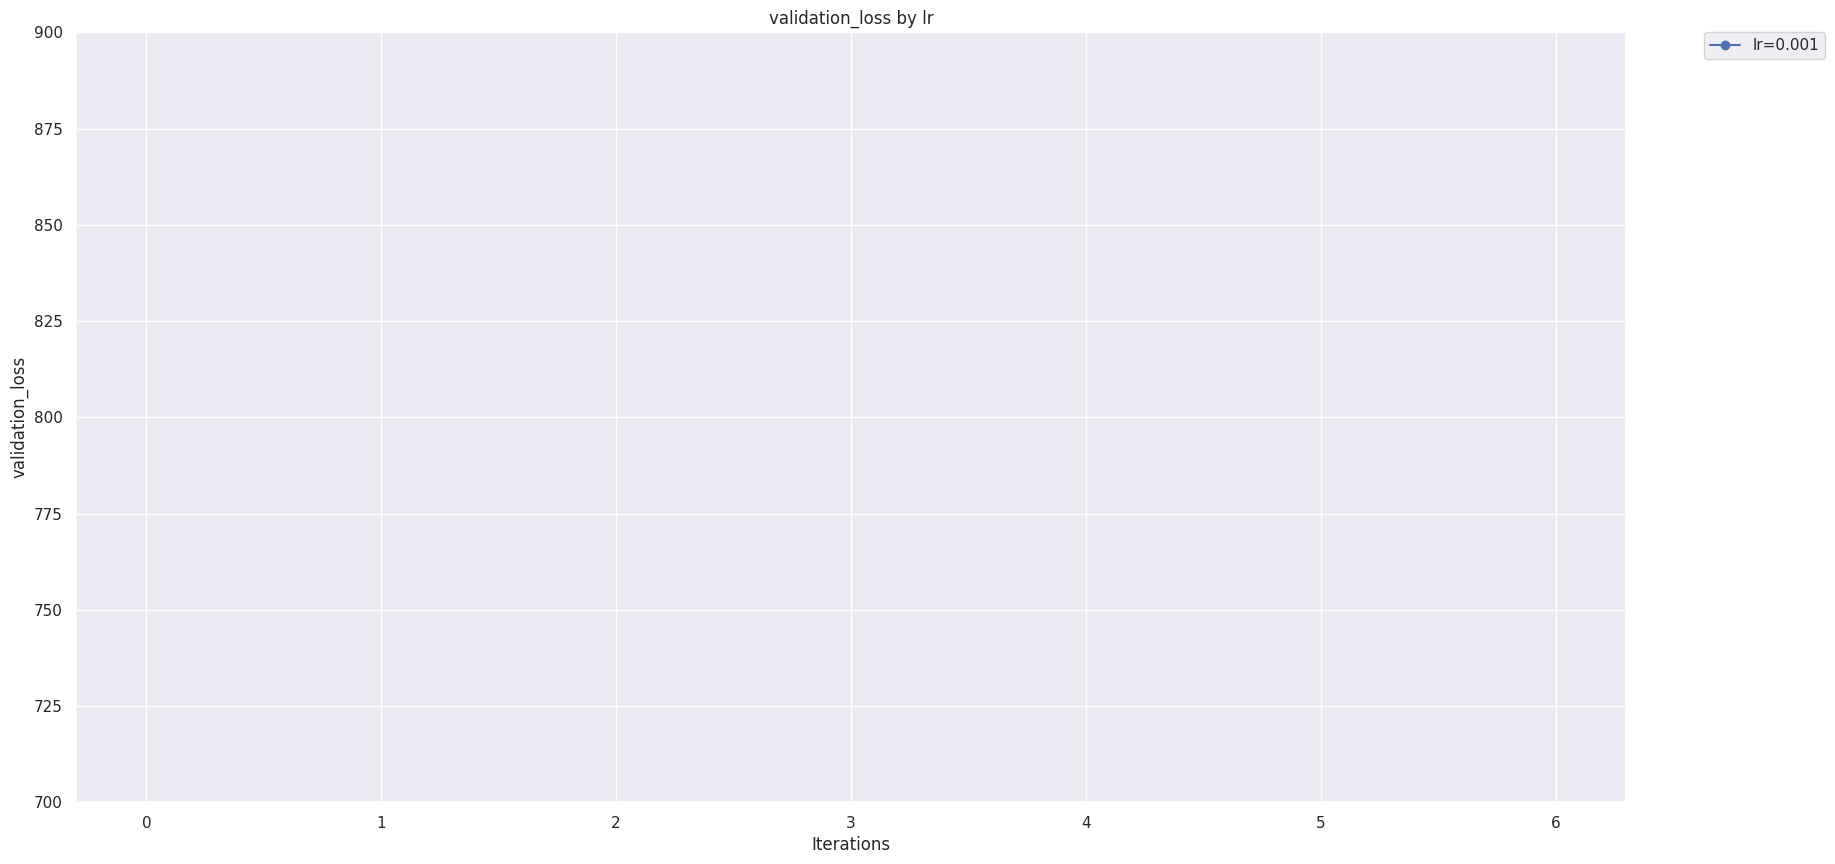

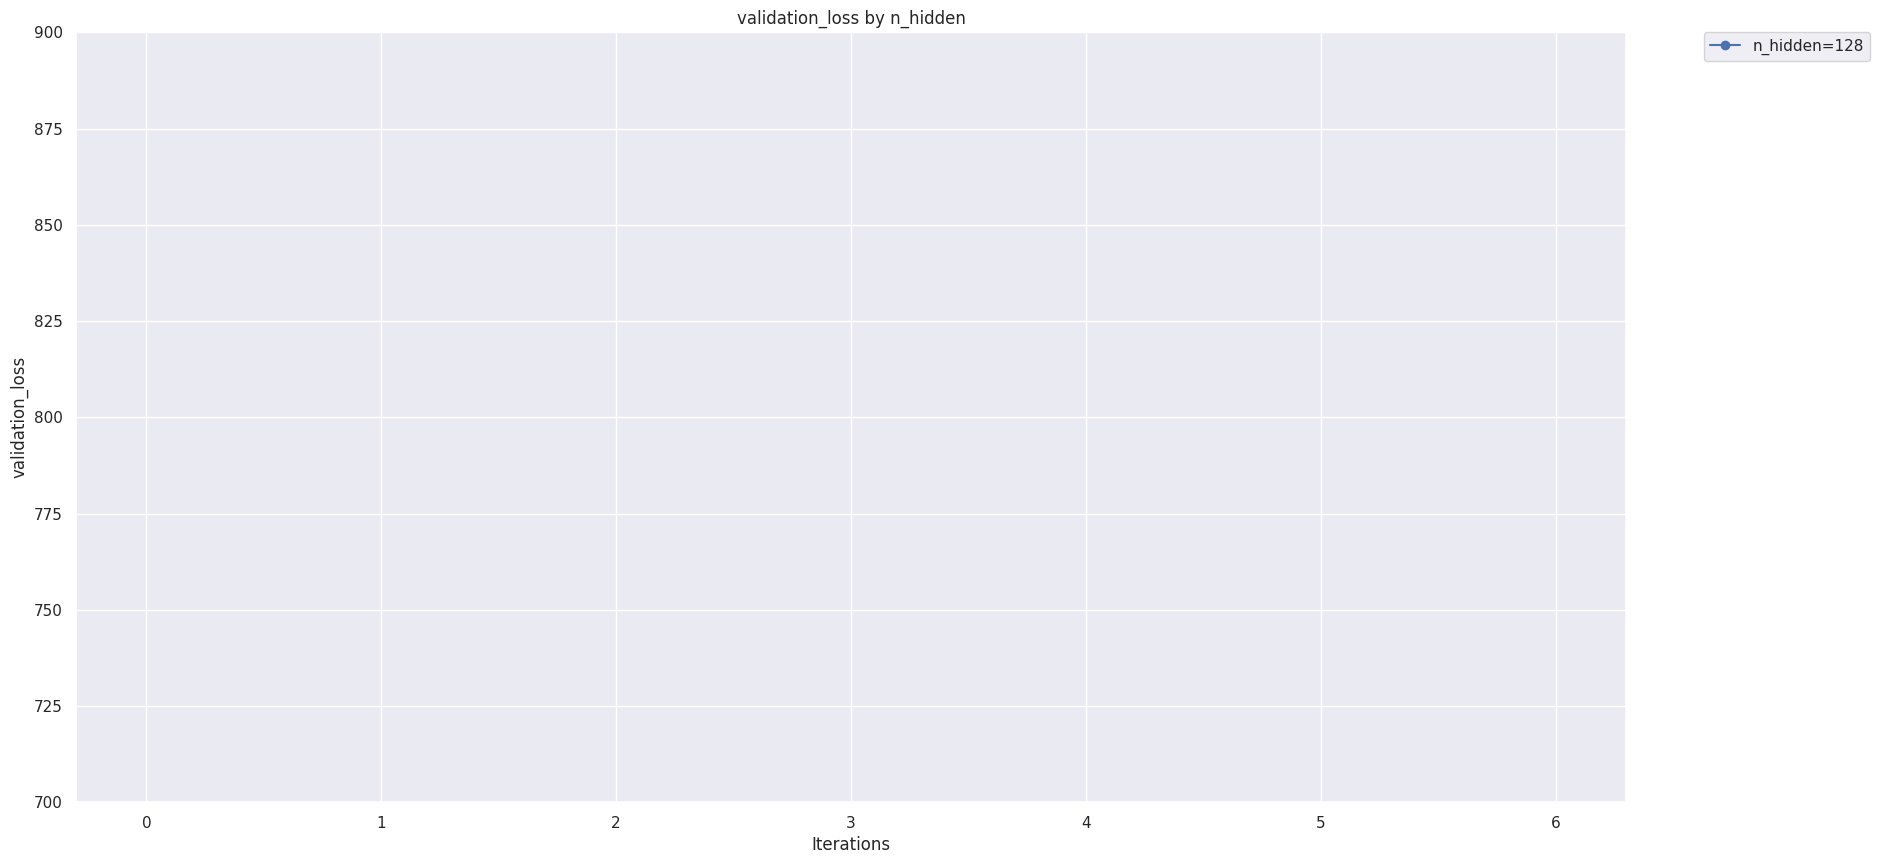

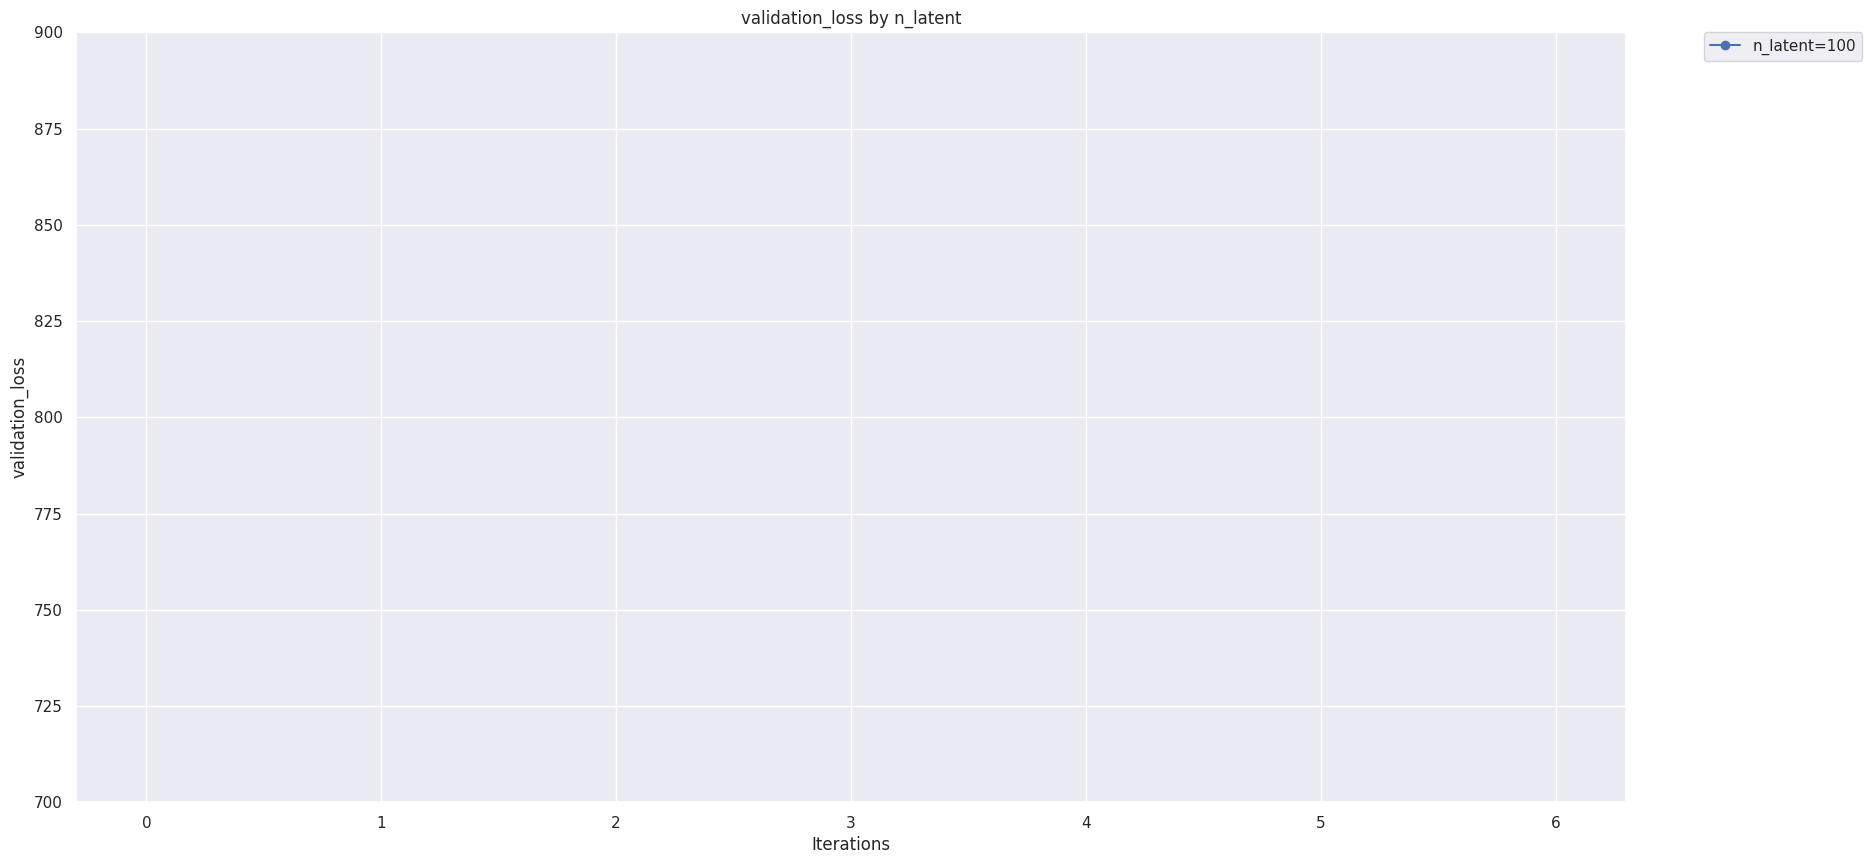

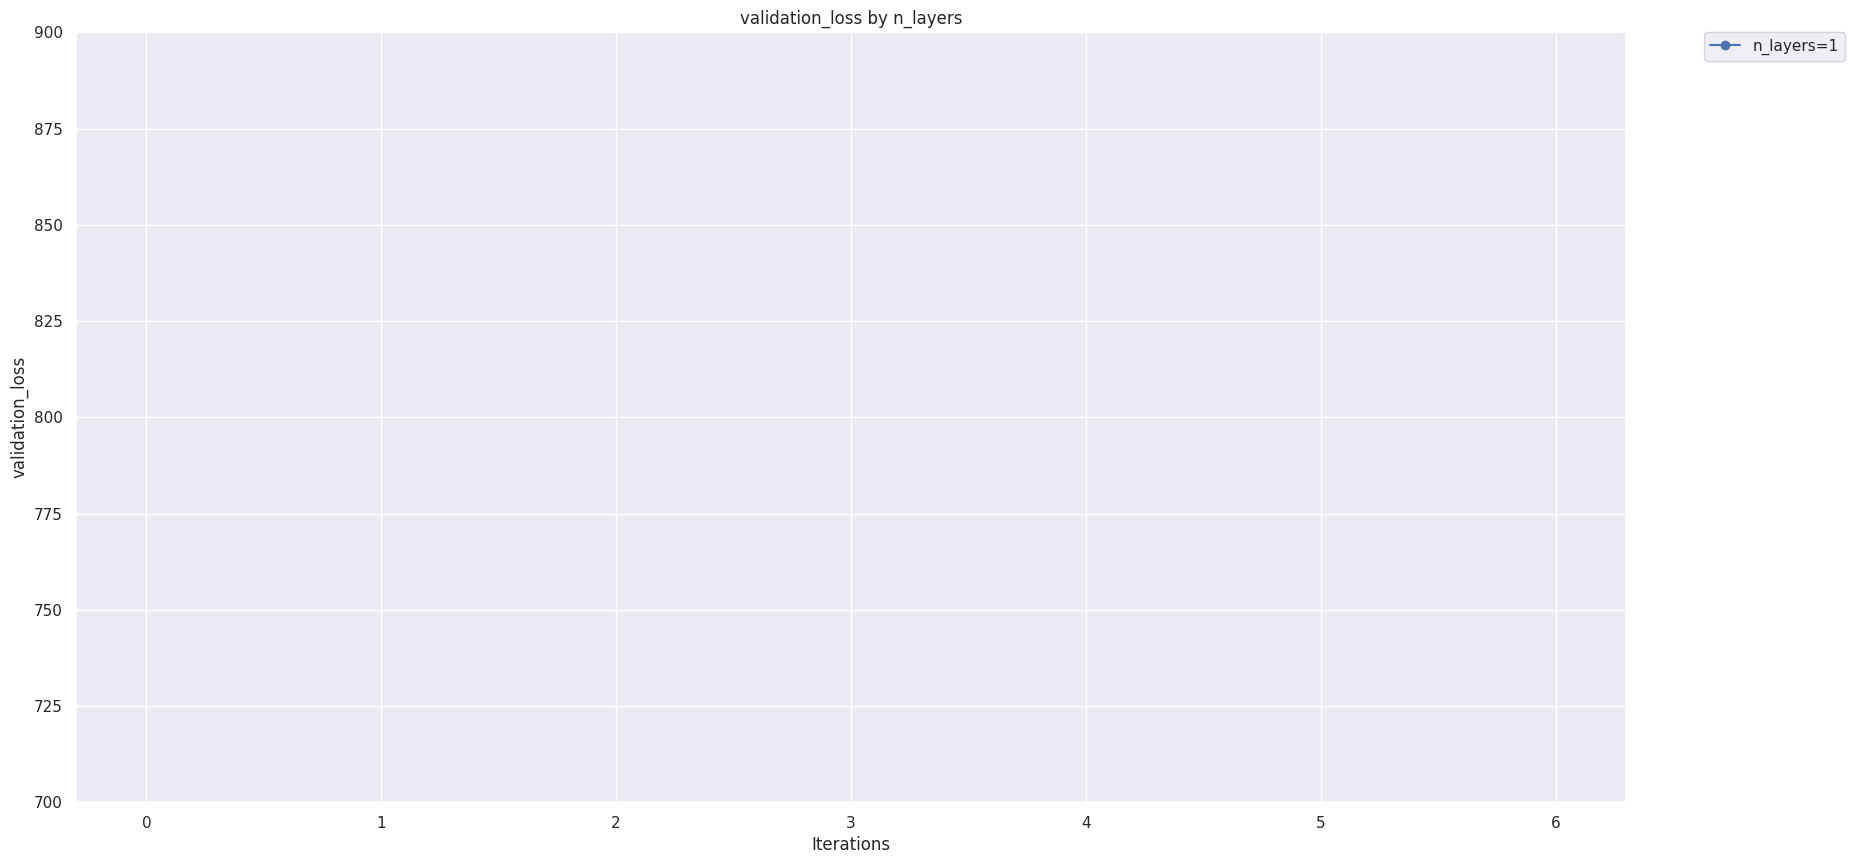

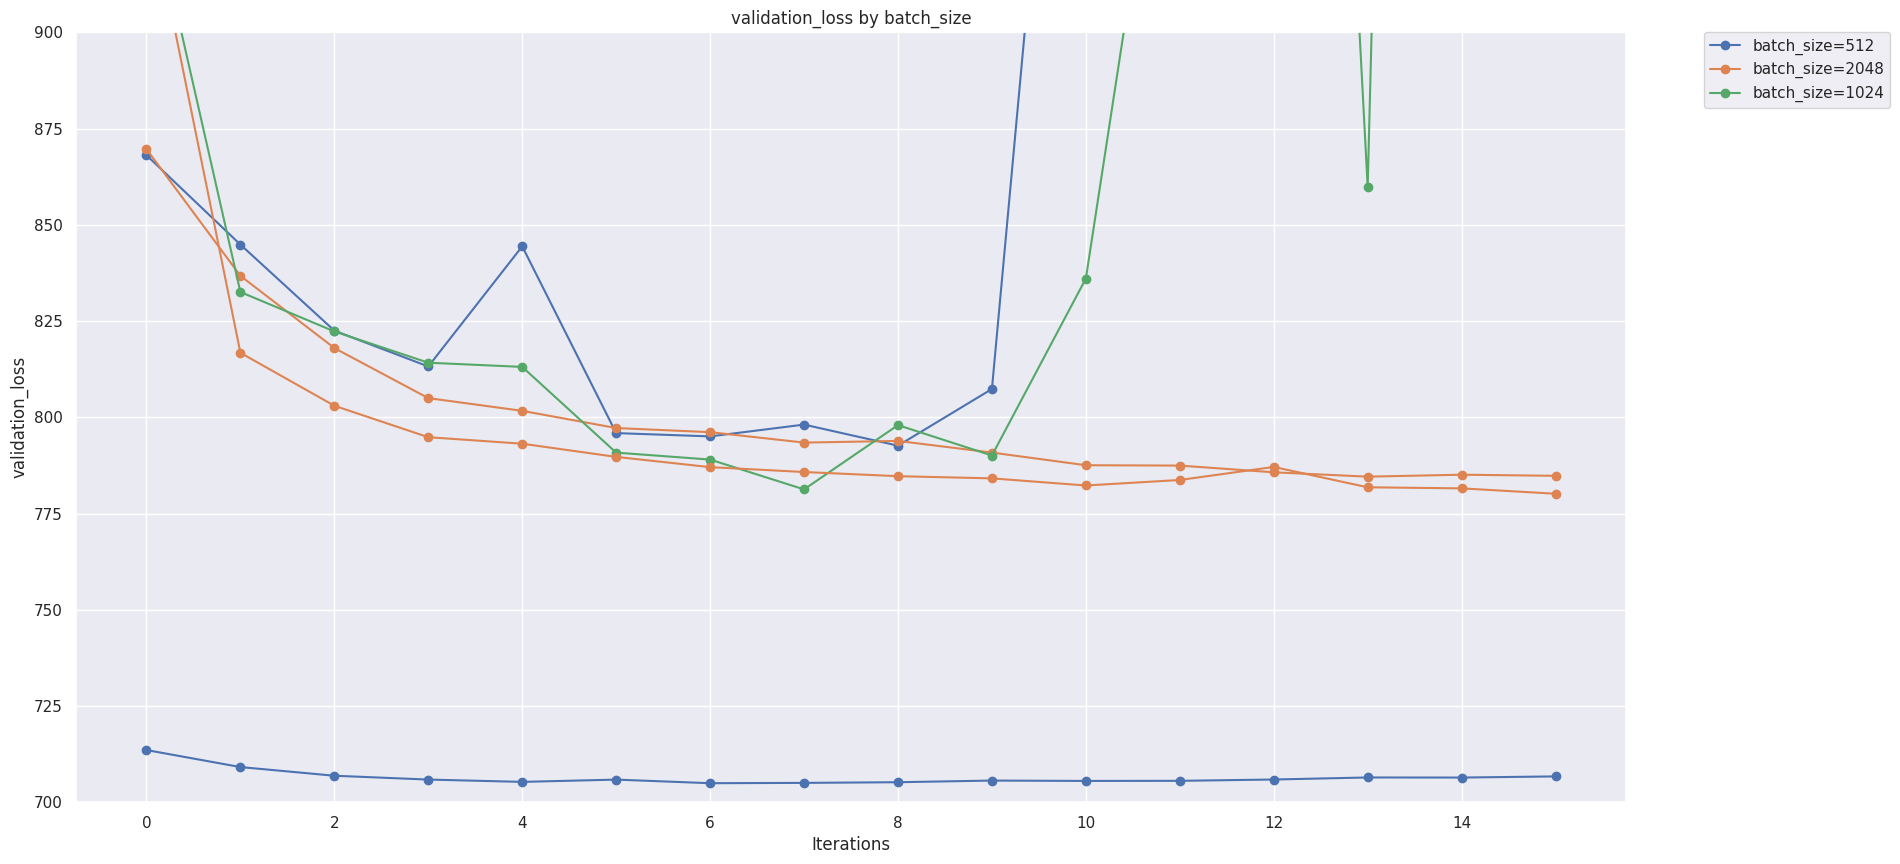

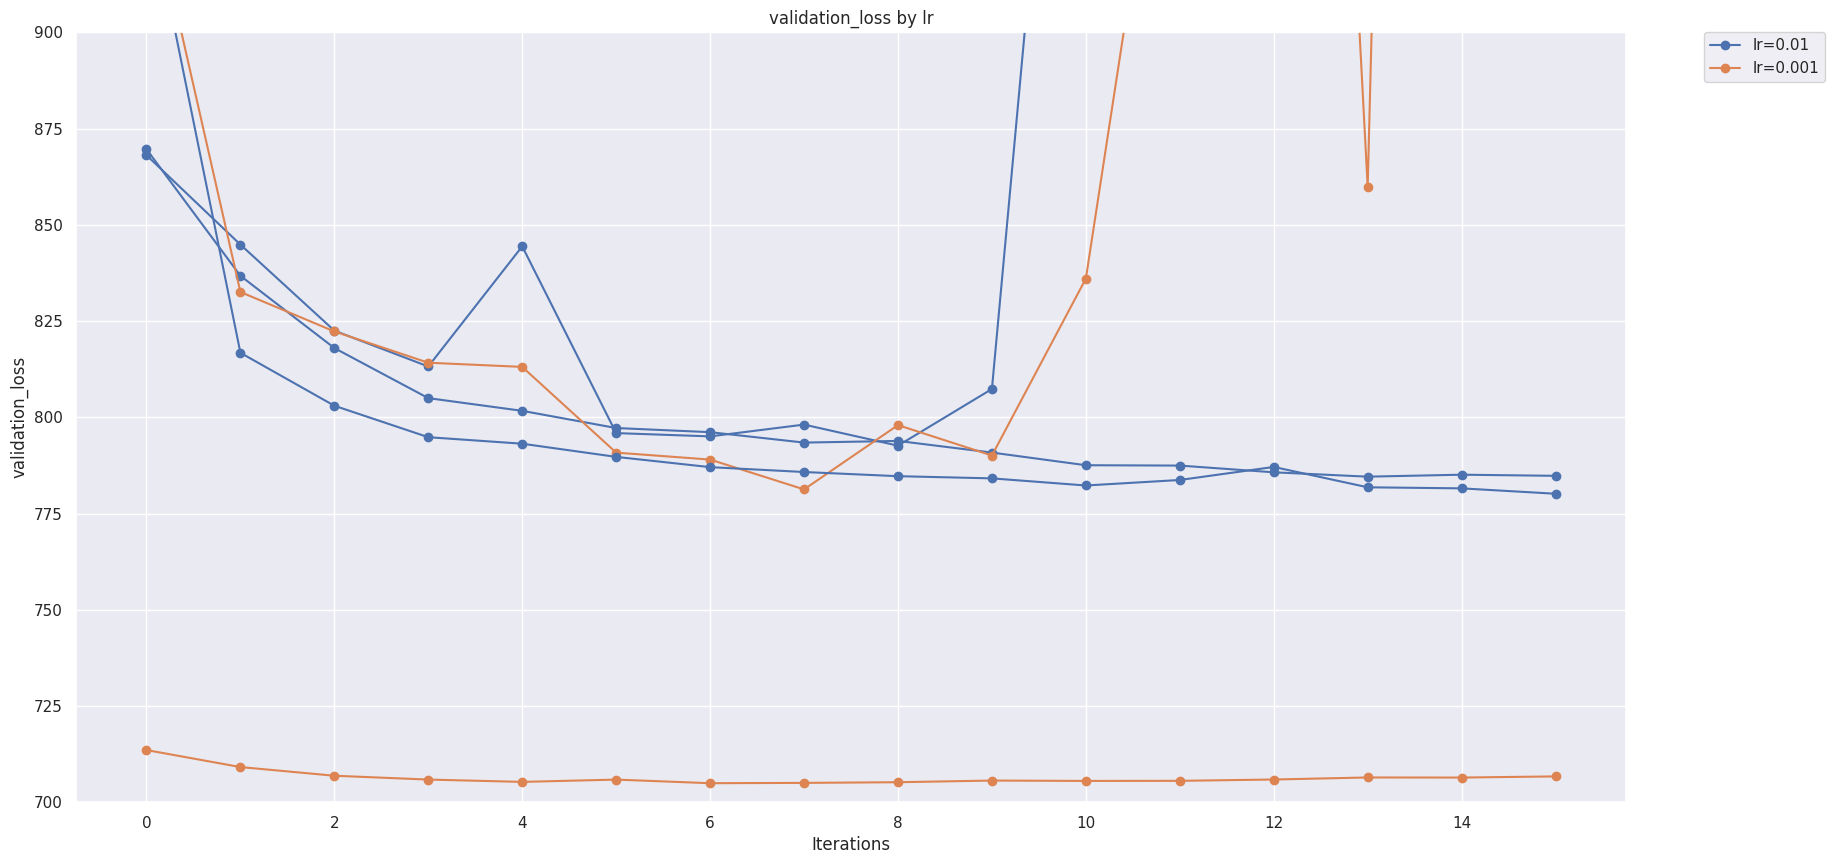

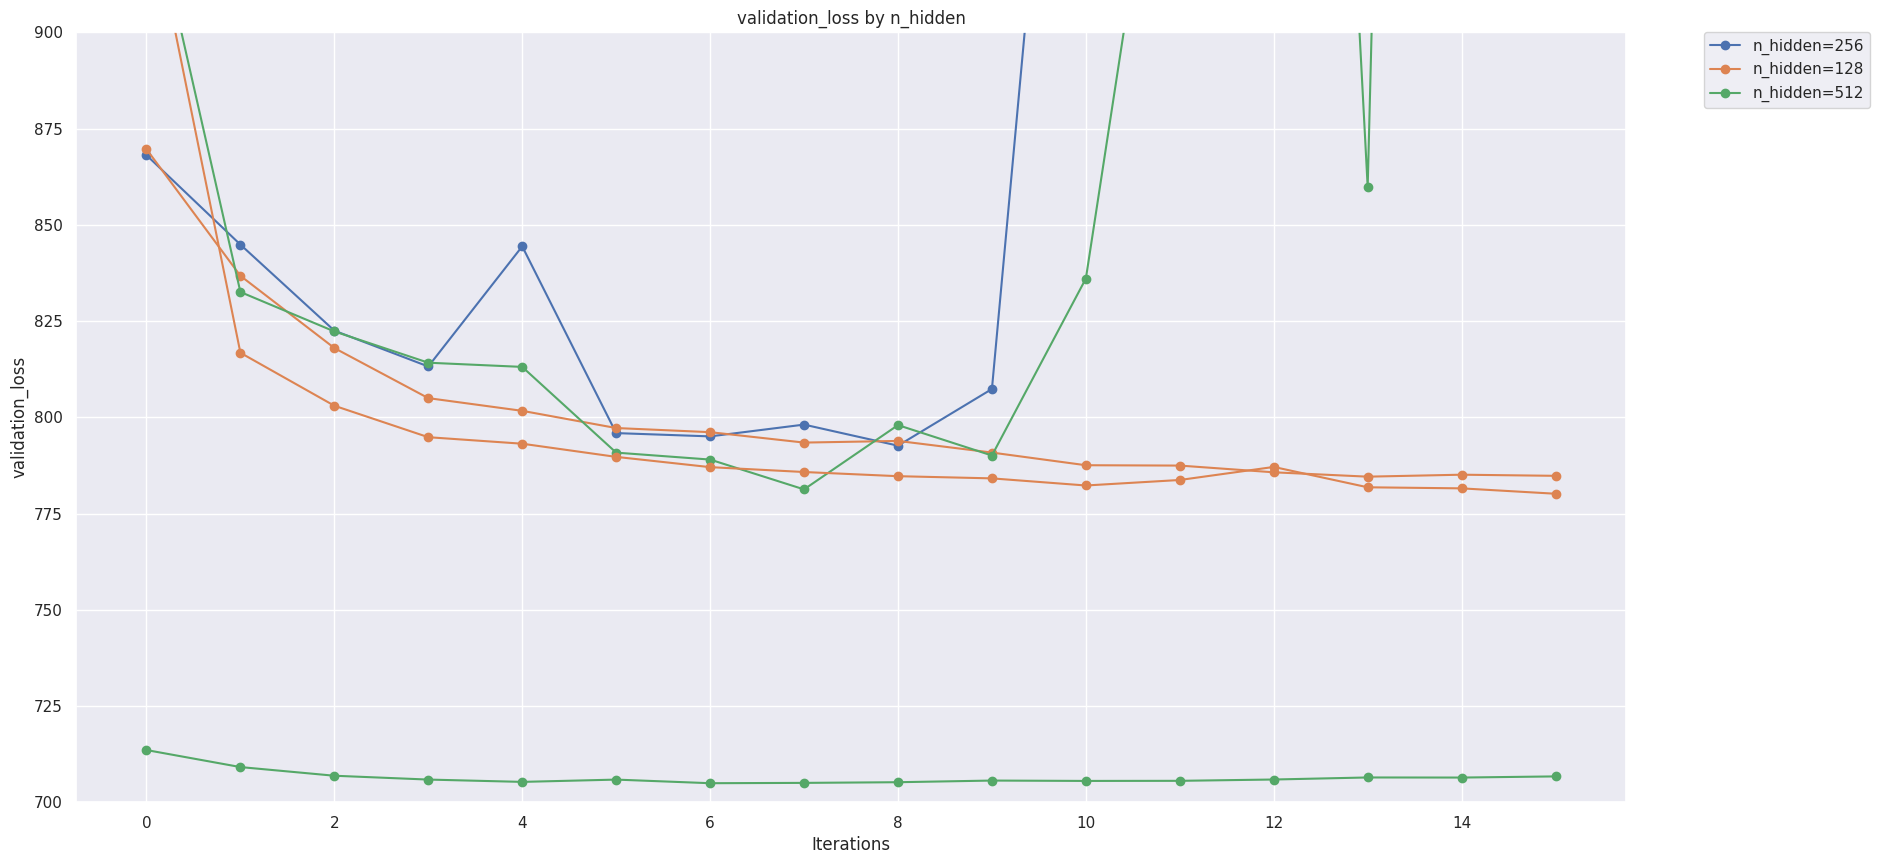

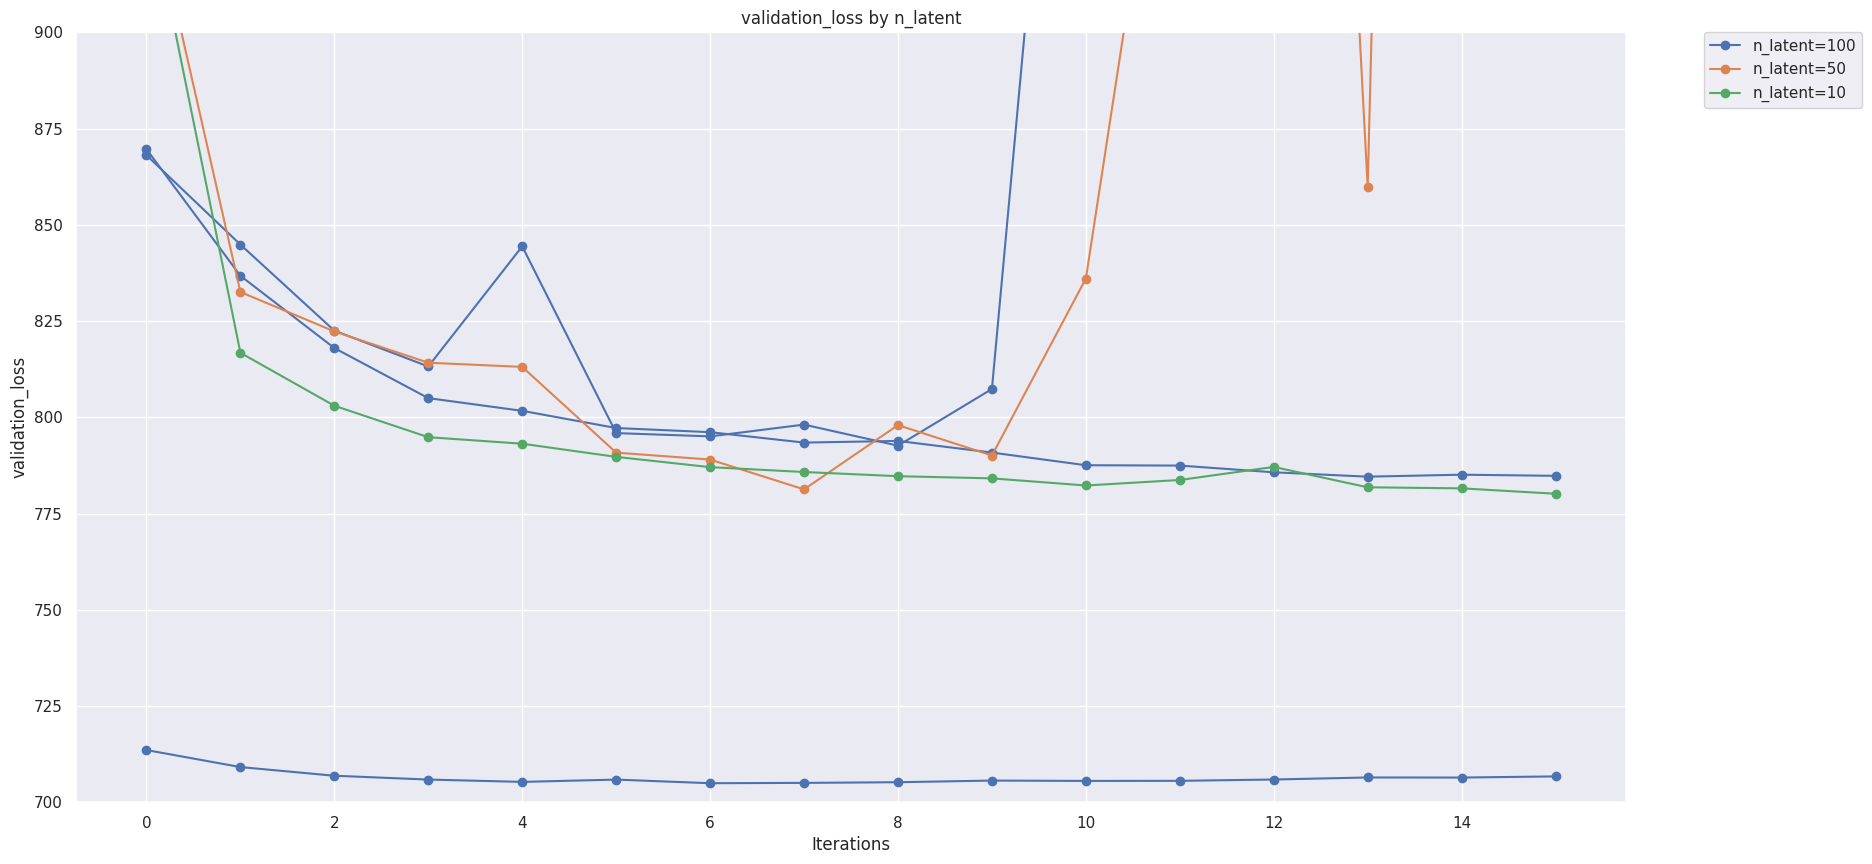

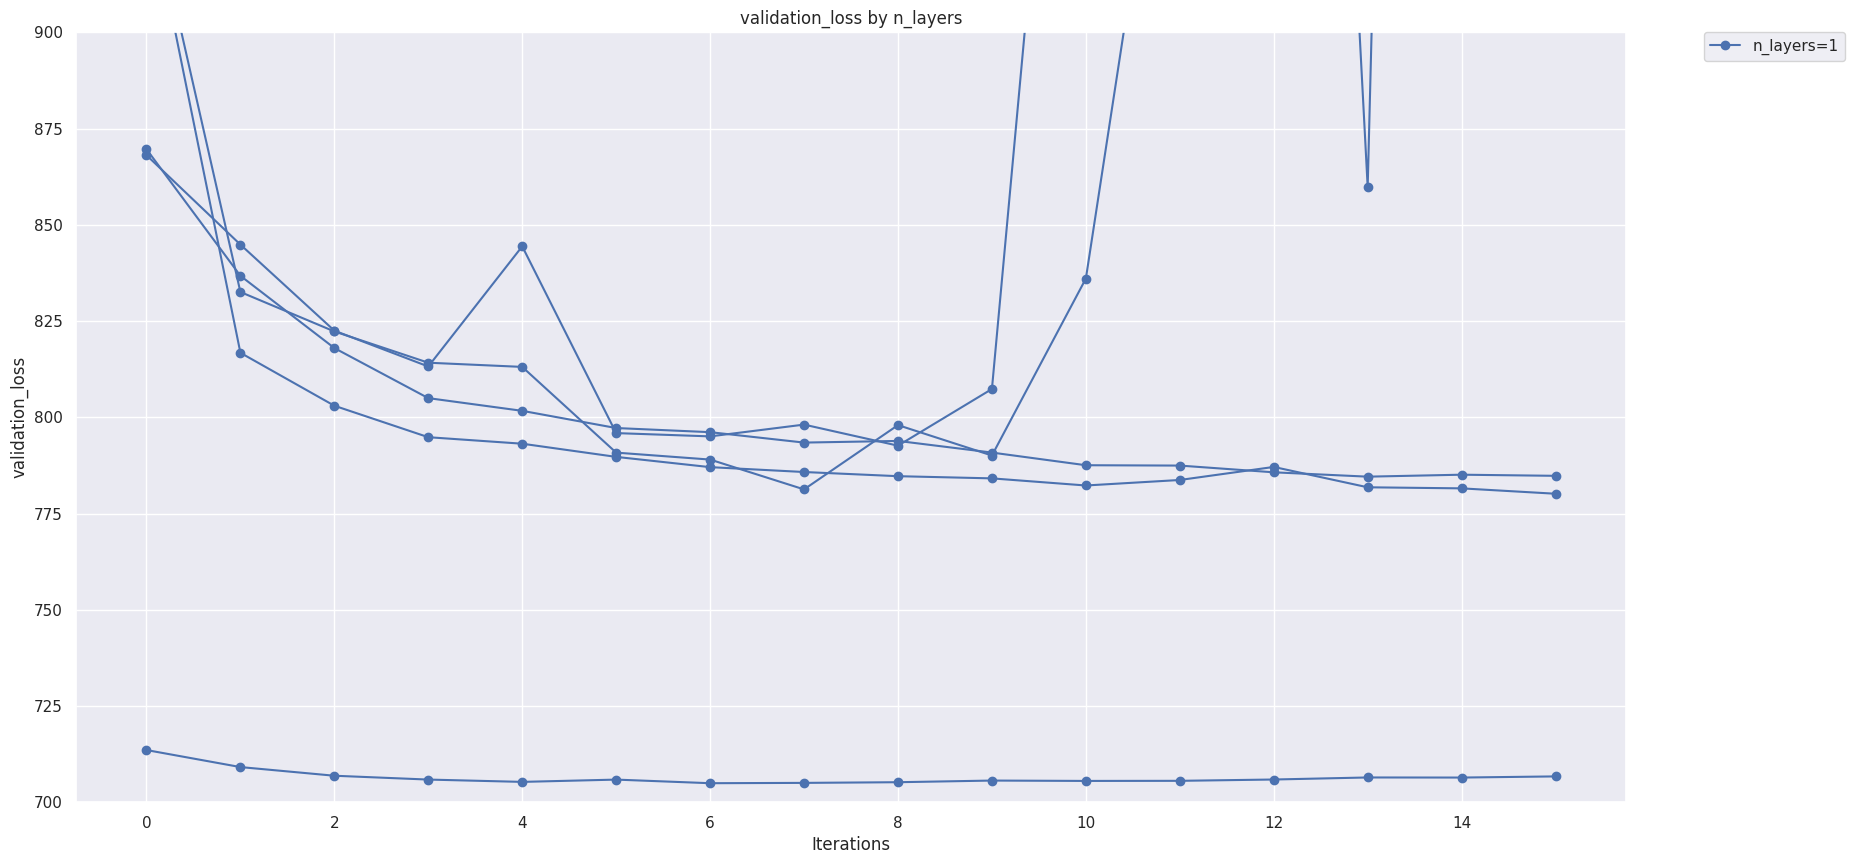

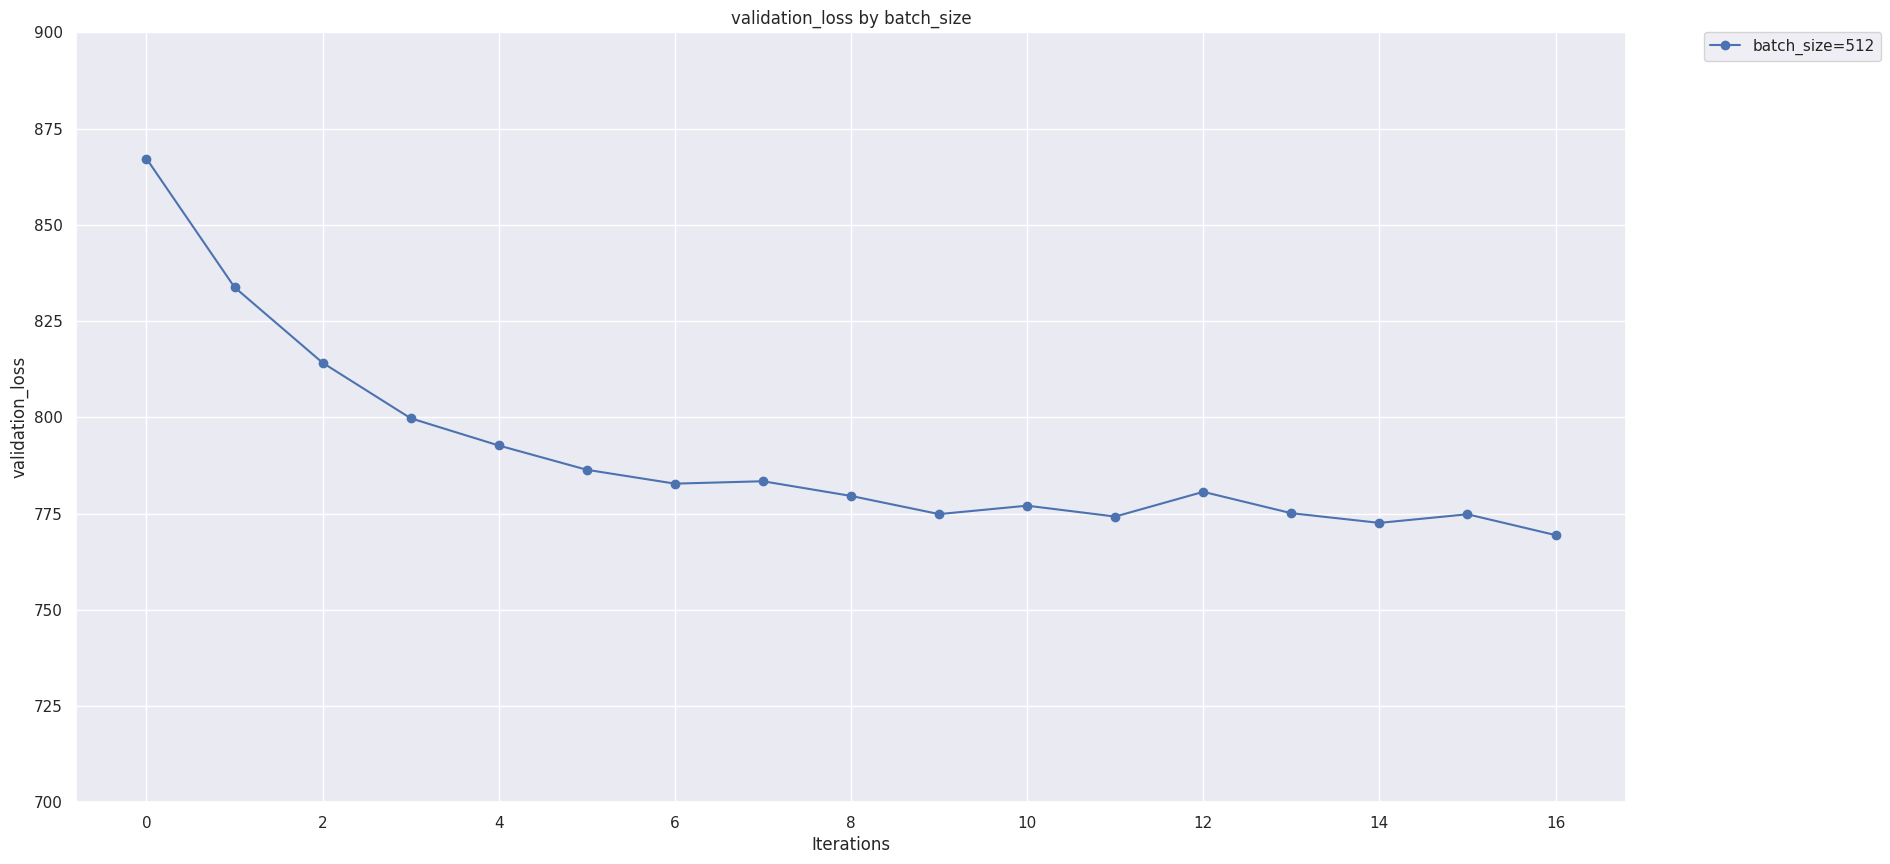

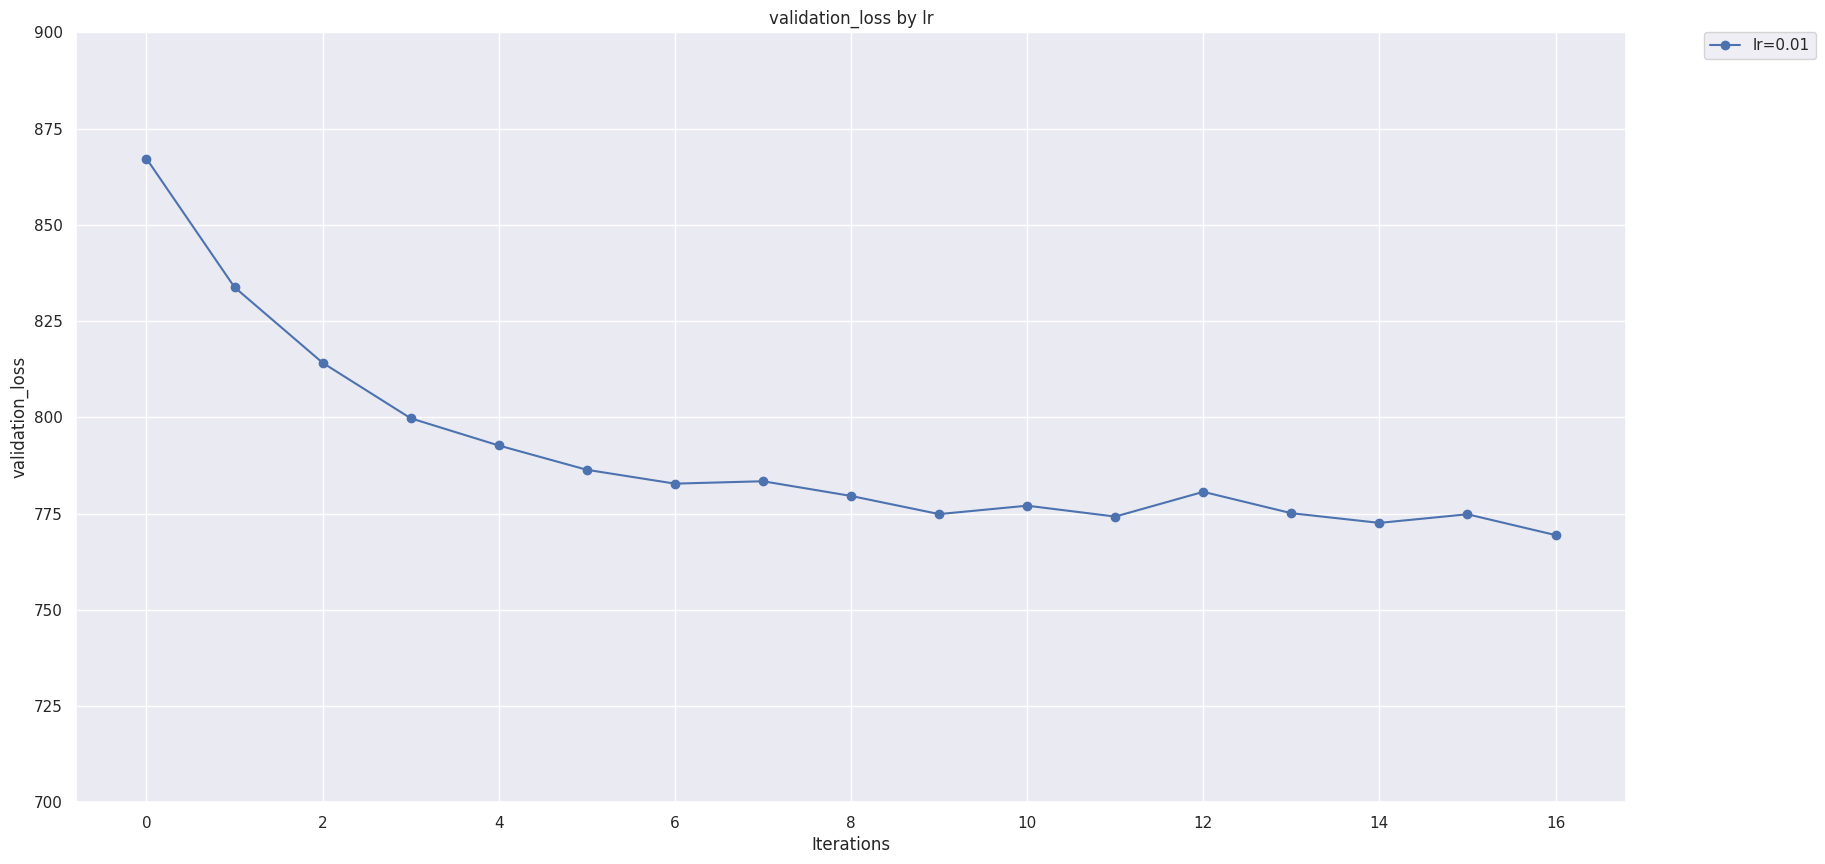

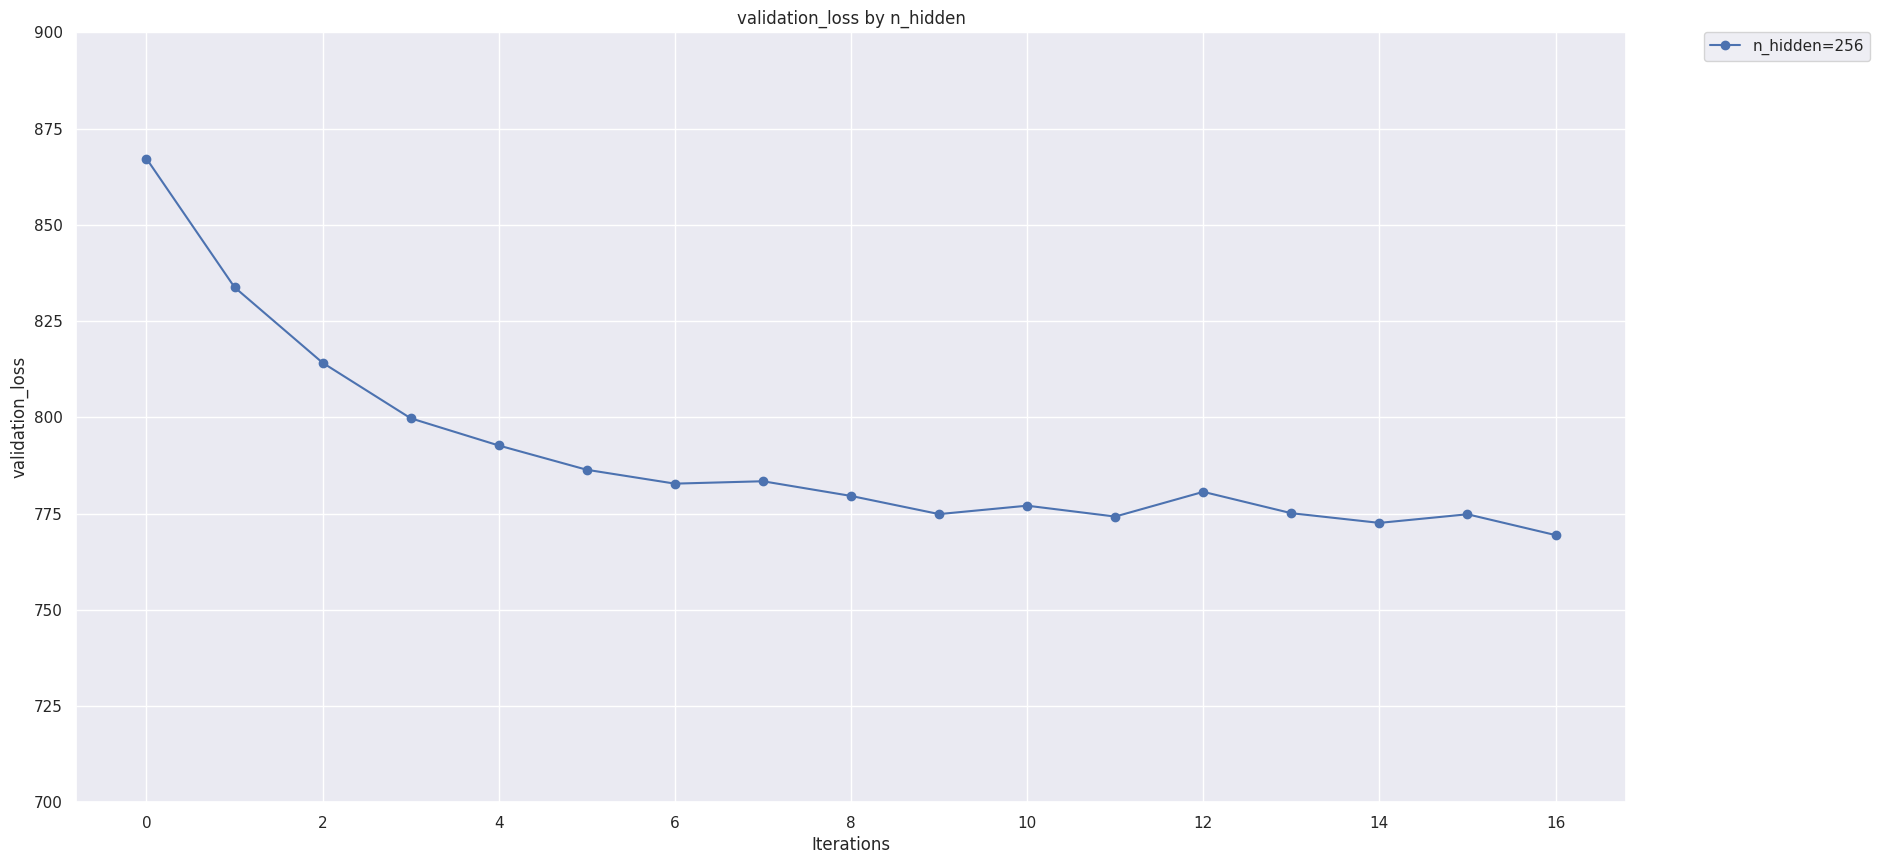

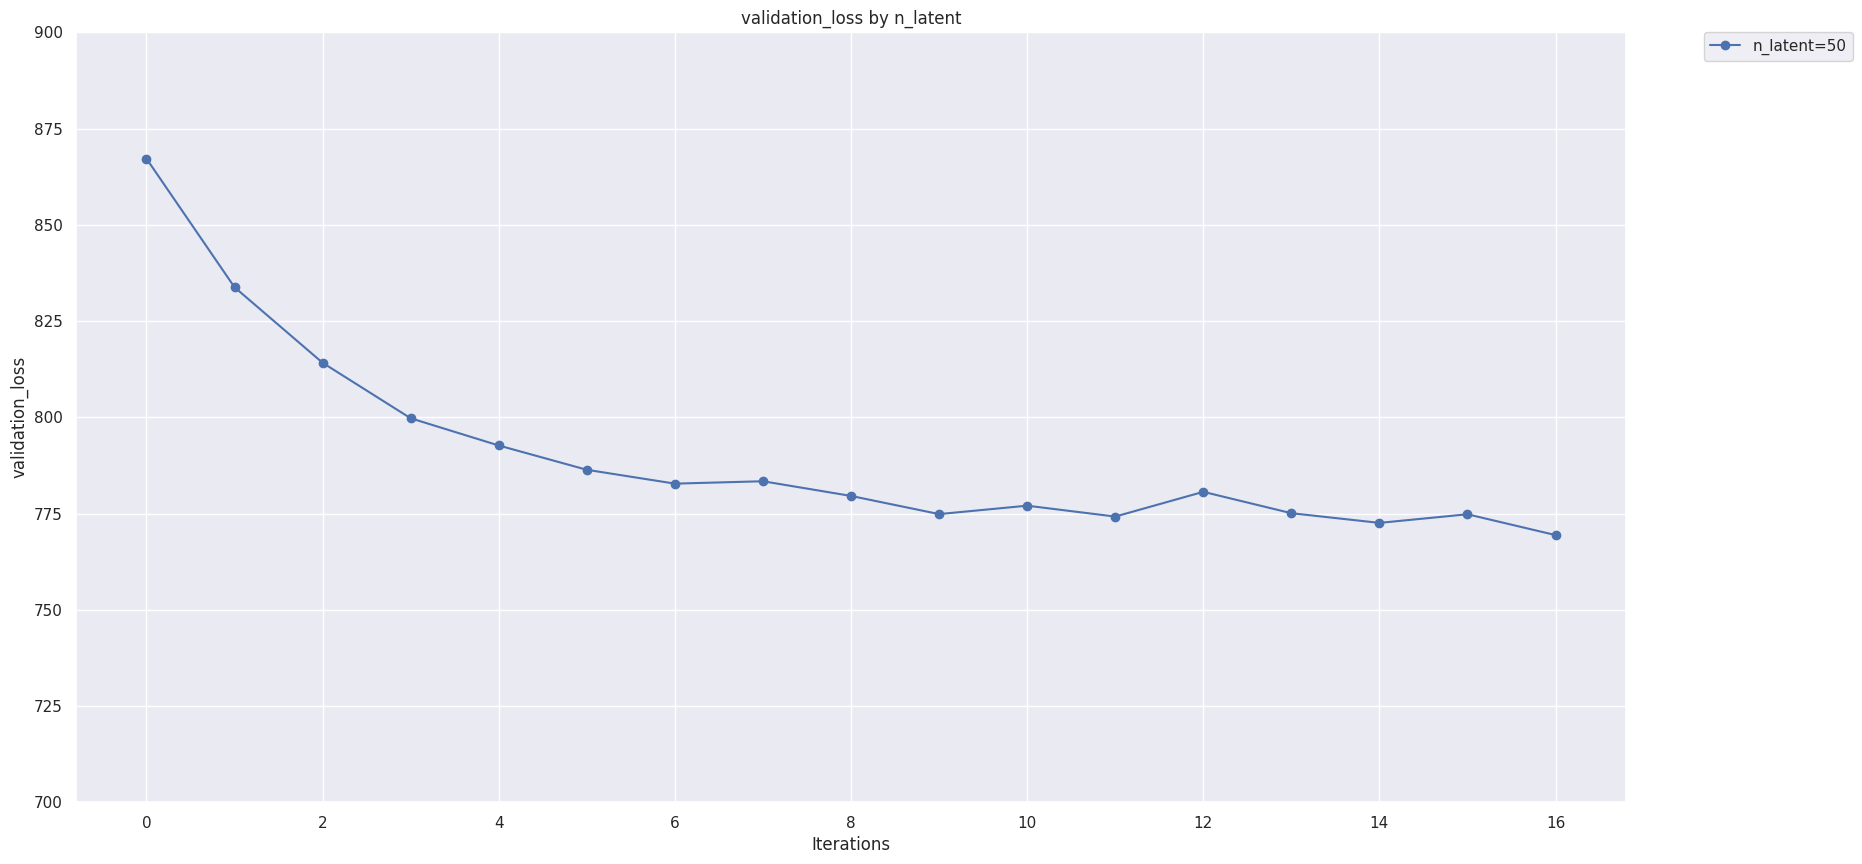

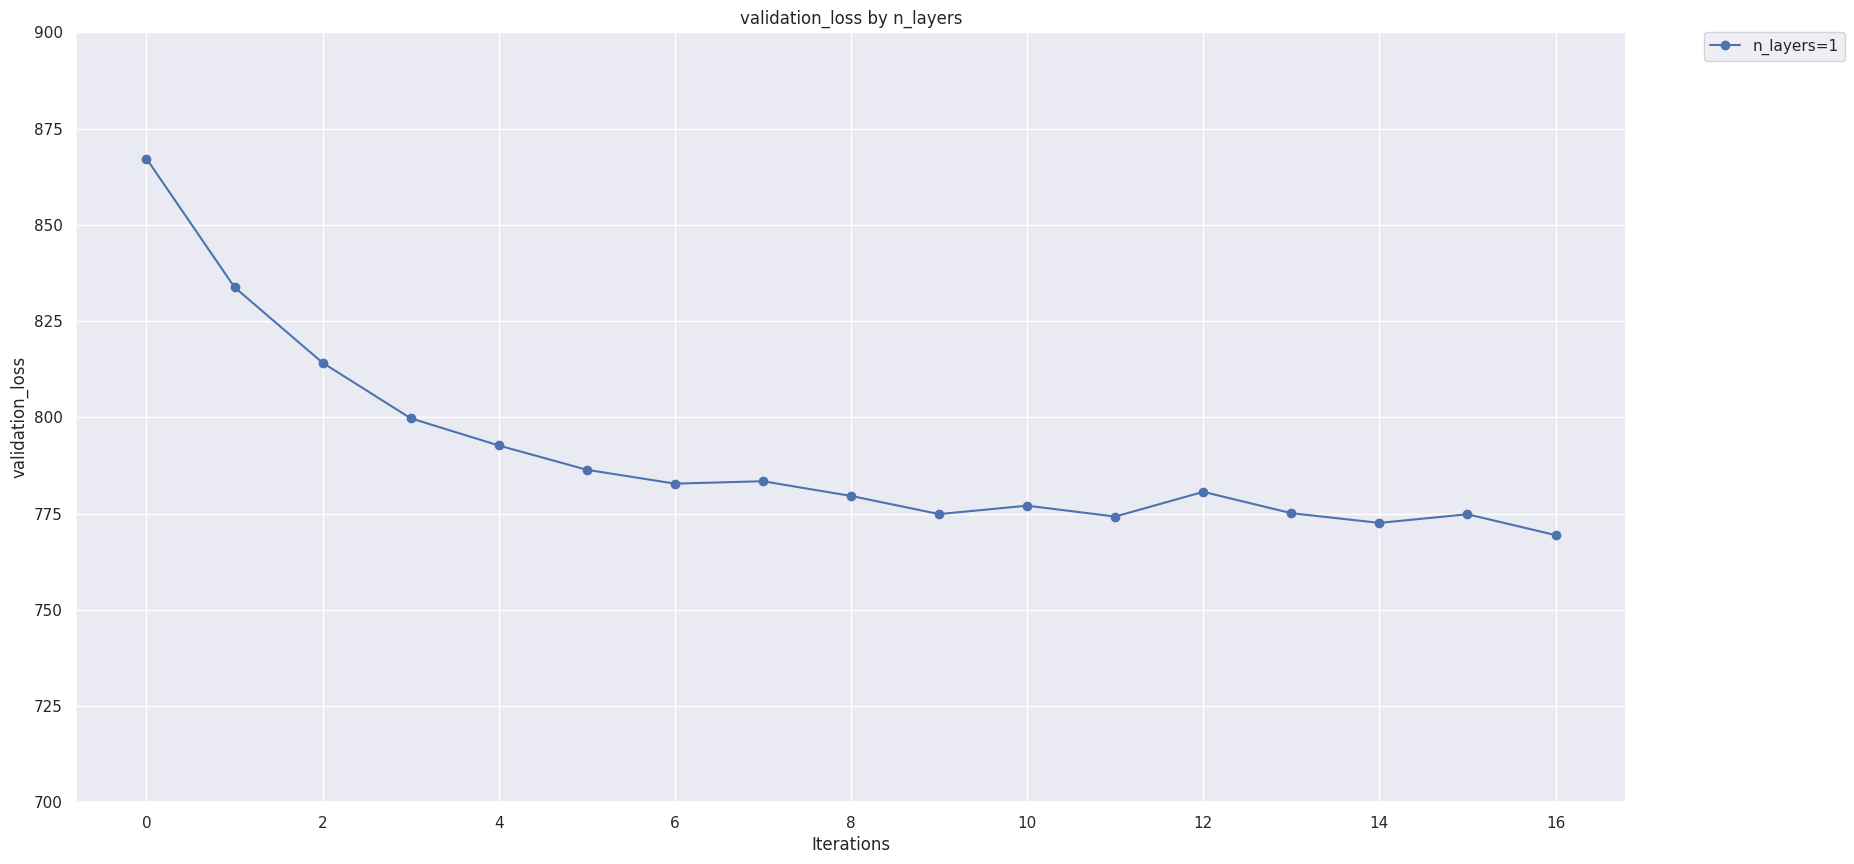

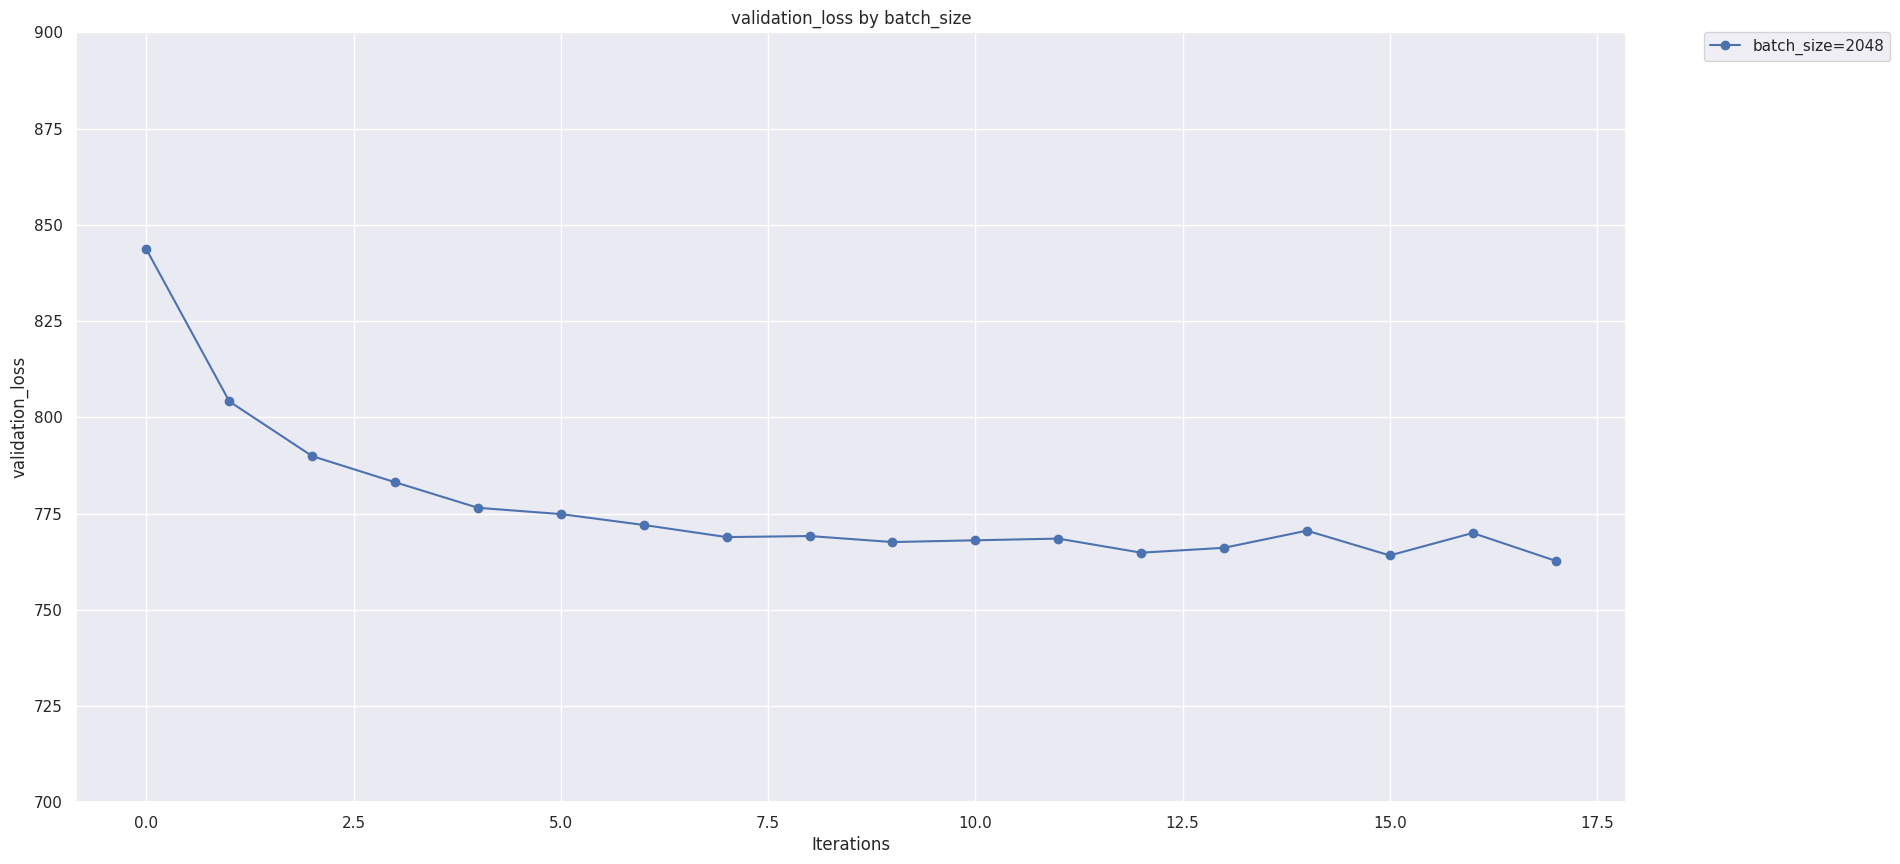

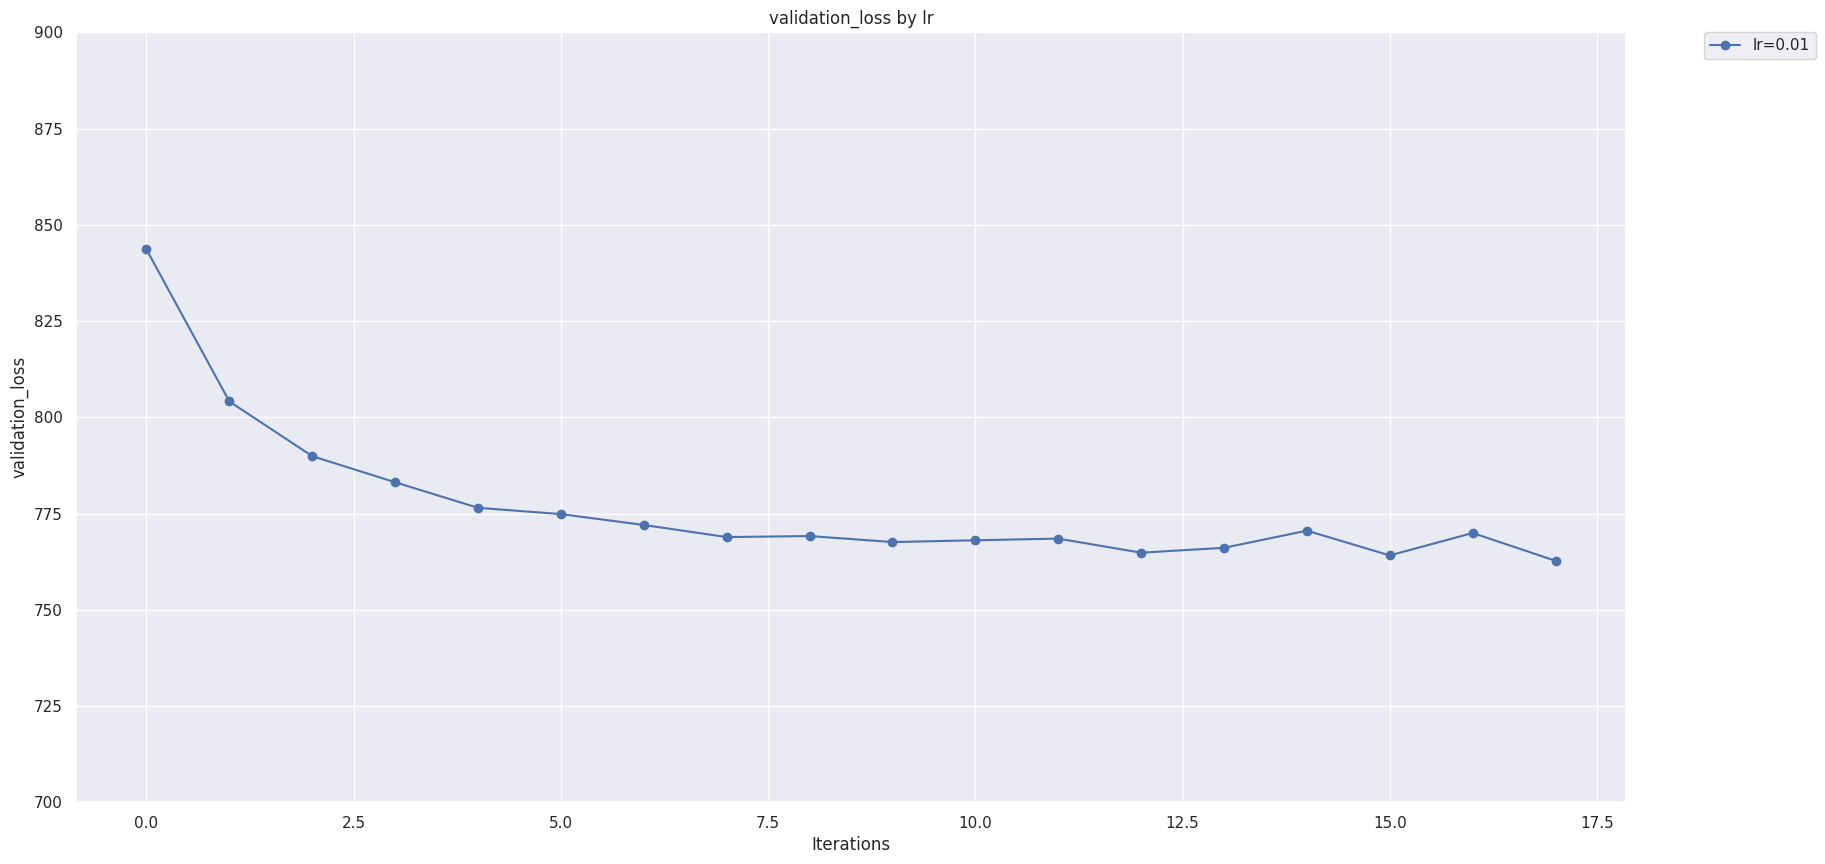

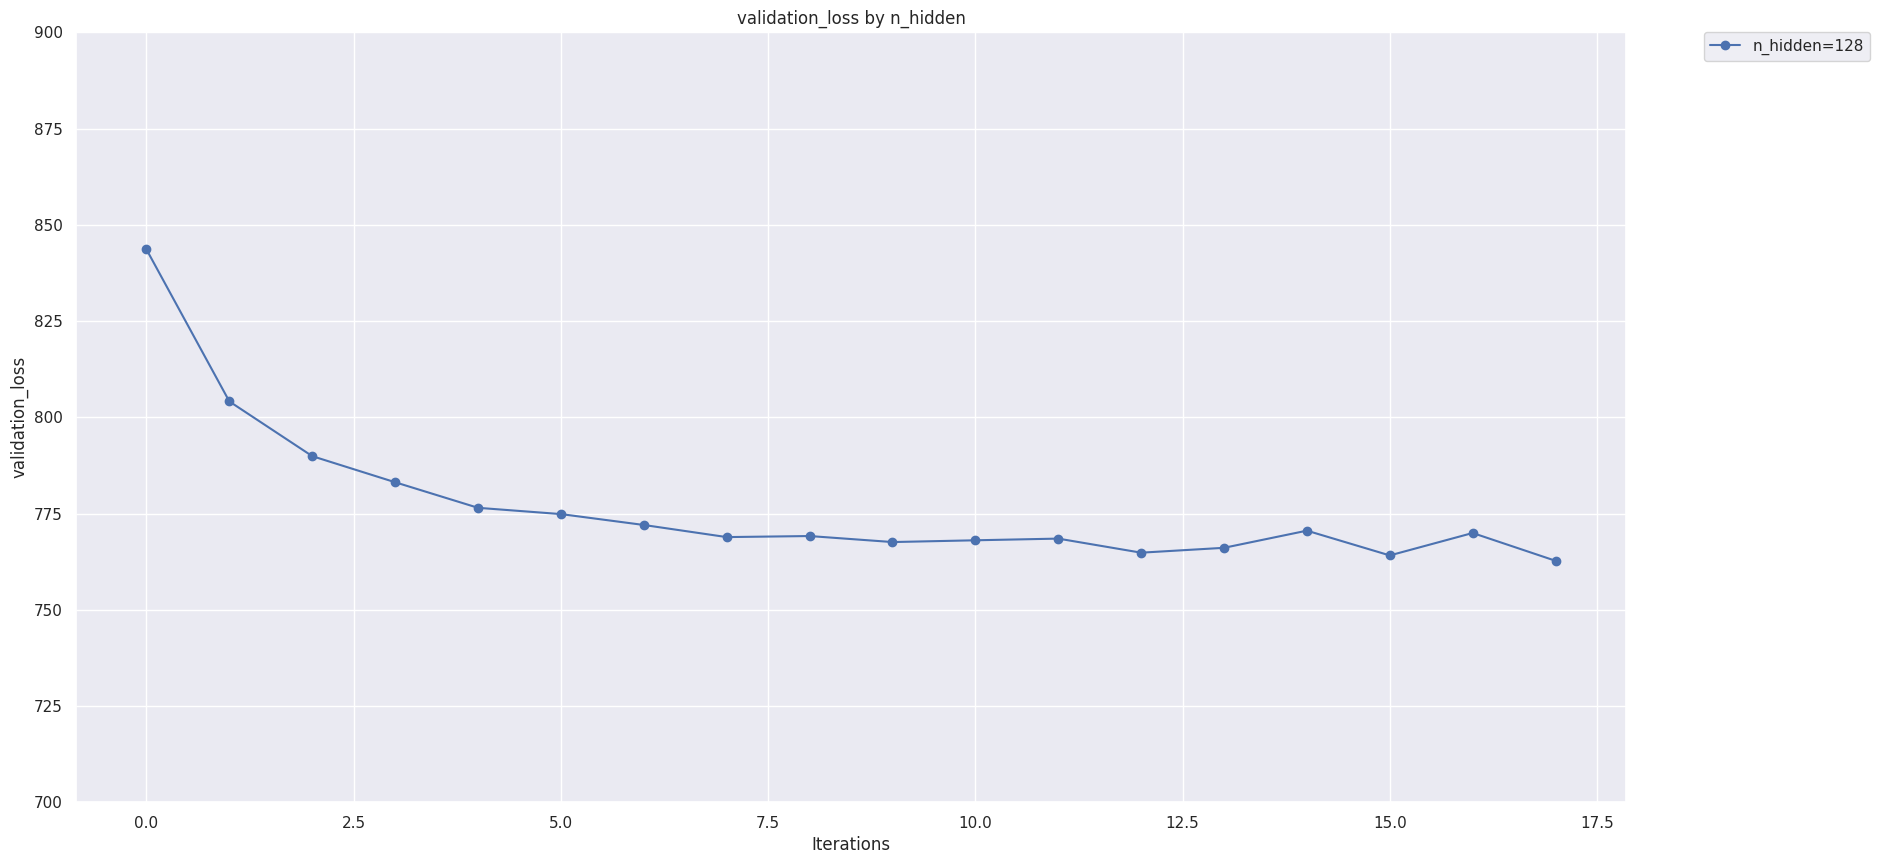

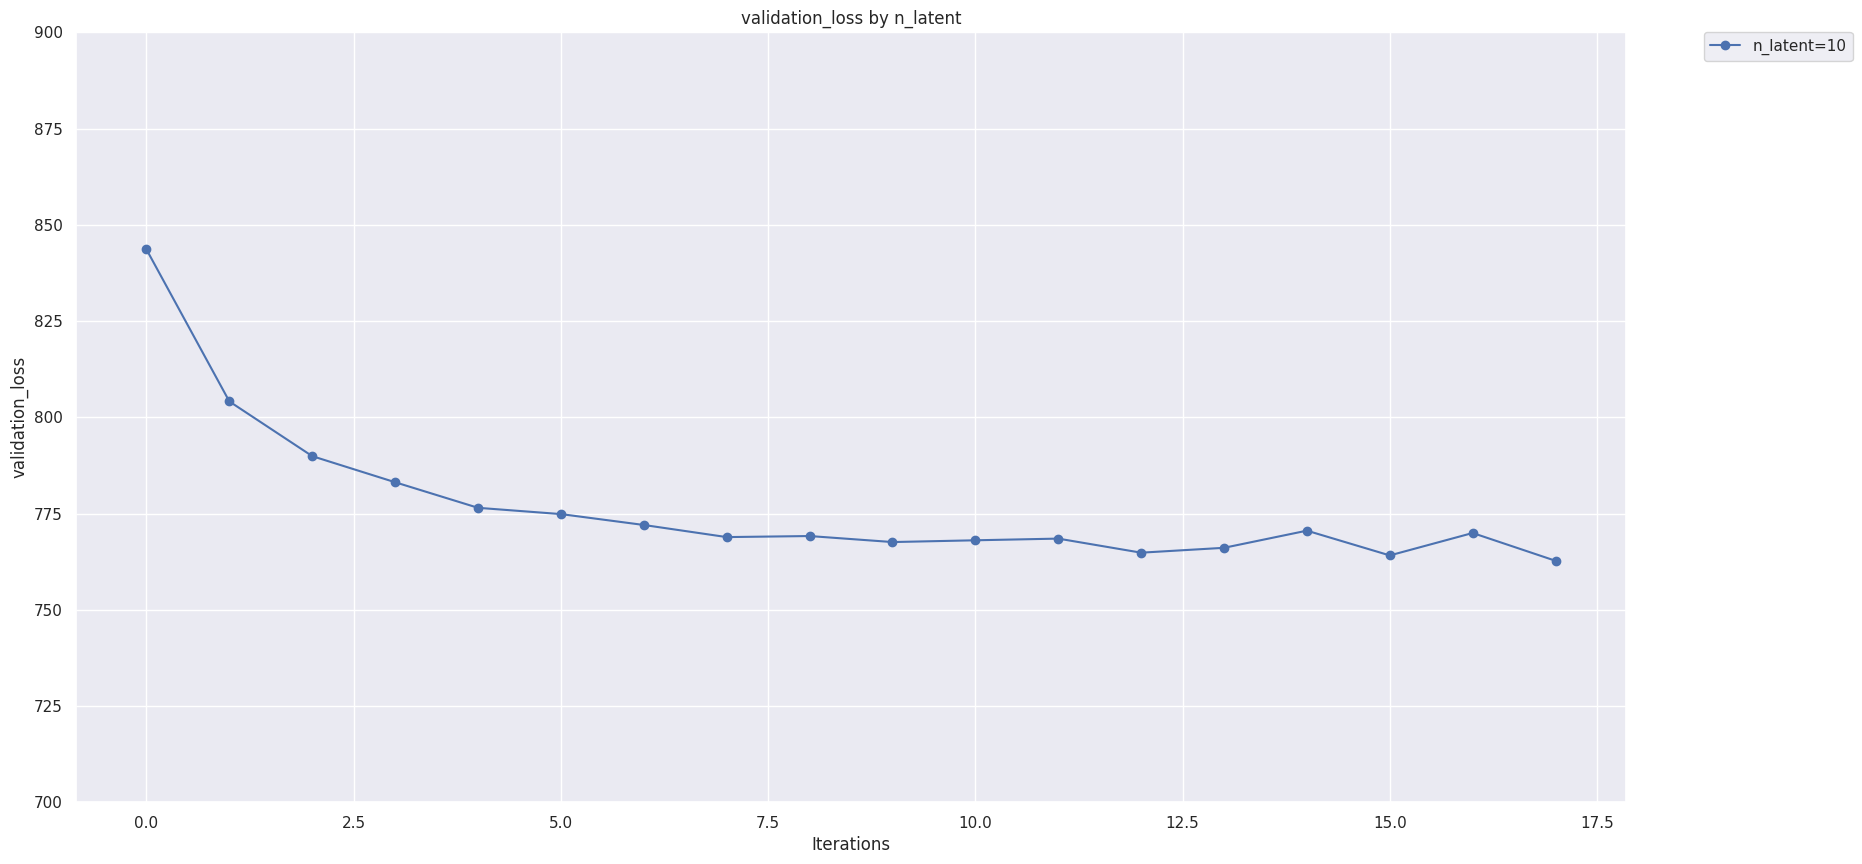

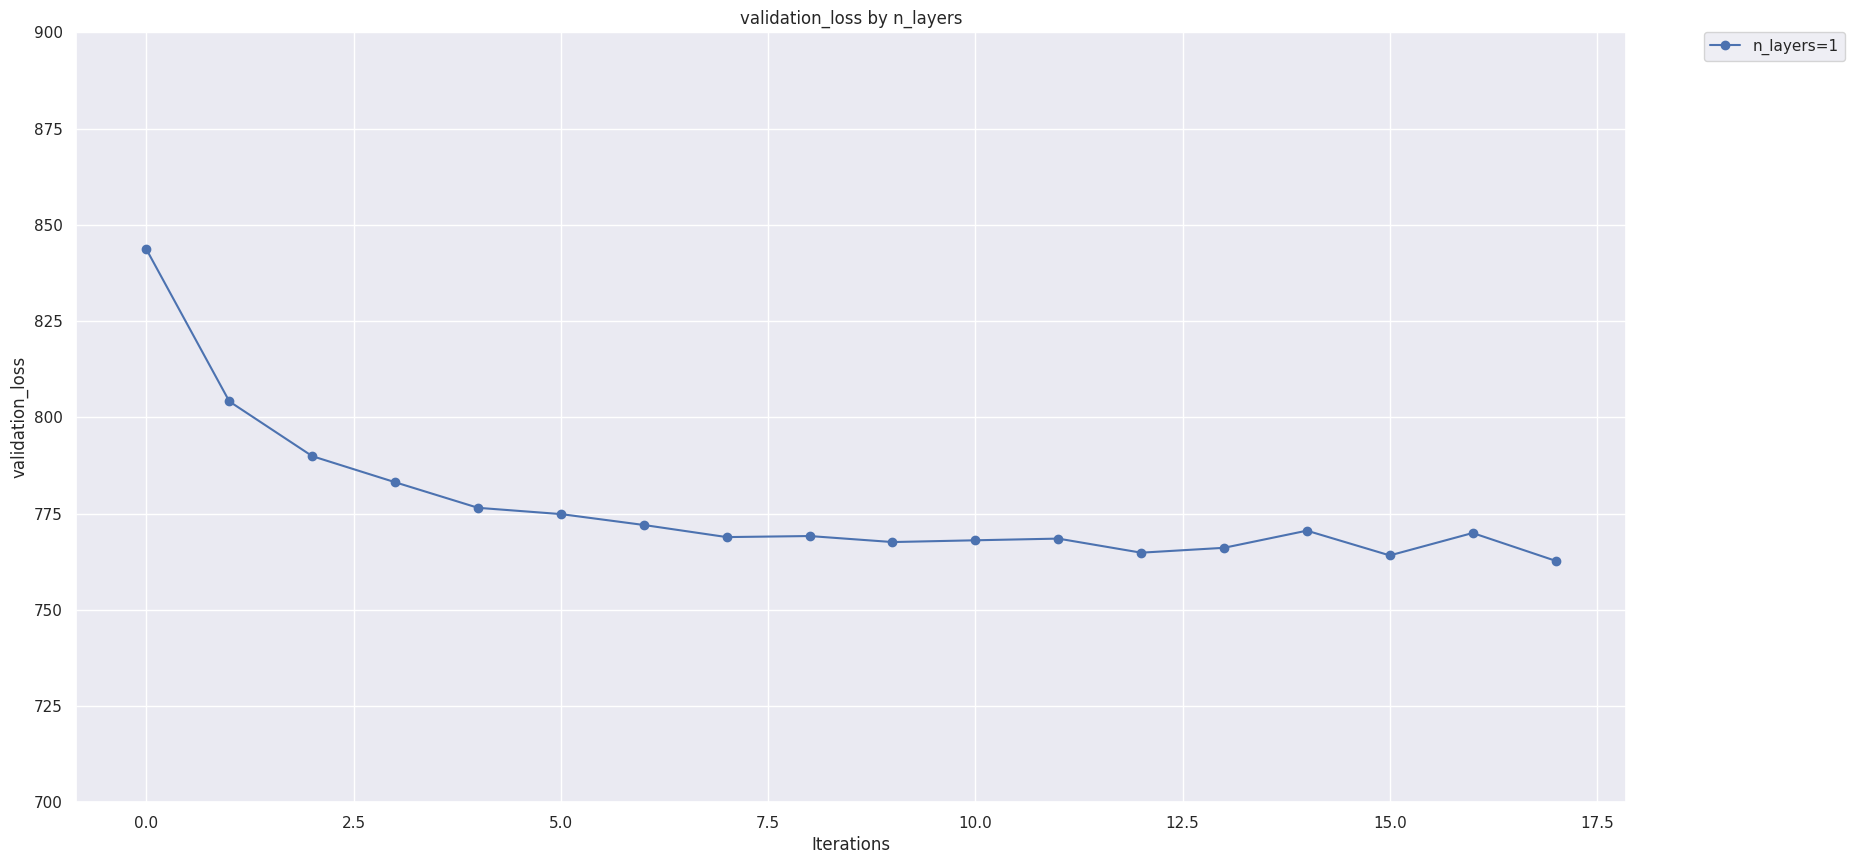

In [10]:
for iters in trial_info["iters"].unique(): 
    if iters < 4:
        continue
    for param in search_params:
        plot_trials(
            trial_info, 
            trial_progress, 
            trial_params, 
            param,
            iters=iters,
            figsize=(20, 10),
            ylim=(700, 900)
        )